# Video Games Sales
This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

From this dataset my task is to predict the gloabl sales -->

In [1]:
#Import libaries
import numpy as np                                #import numpy
import pandas as pd                               #import pandas
import seaborn as sns                             #import seaborn
import matplotlib.pyplot as plt                   #import matplotlib
%matplotlib inline
plt.show()

plt.style.use("dark_background")                  #plot background change to black

import warnings                                   #import waarnings
warnings.filterwarnings("ignore")

In [2]:
#Import full dataset
df=pd.read_csv("vgsales.csv")                   #Train and test data

display(df.head(10))                            #Display top 10 data

missing_value = df.isnull().sum()
print(f"Missing value is each variable: ",missing_value)      #Missing value display

info_data = df.info()
print(f"Information of dataset: ",info_data)                  #information display

describe_data = df.describe()
print(f"Statistics of data: ",describe_data)                  #Statistics display

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


Missing value is each variable:  Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
Info

-In year and publisher variables have some missing values
-Name, Platform ,Genre, Publisher variables are object type

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  Text(32, 0, '2012.0'),
  T

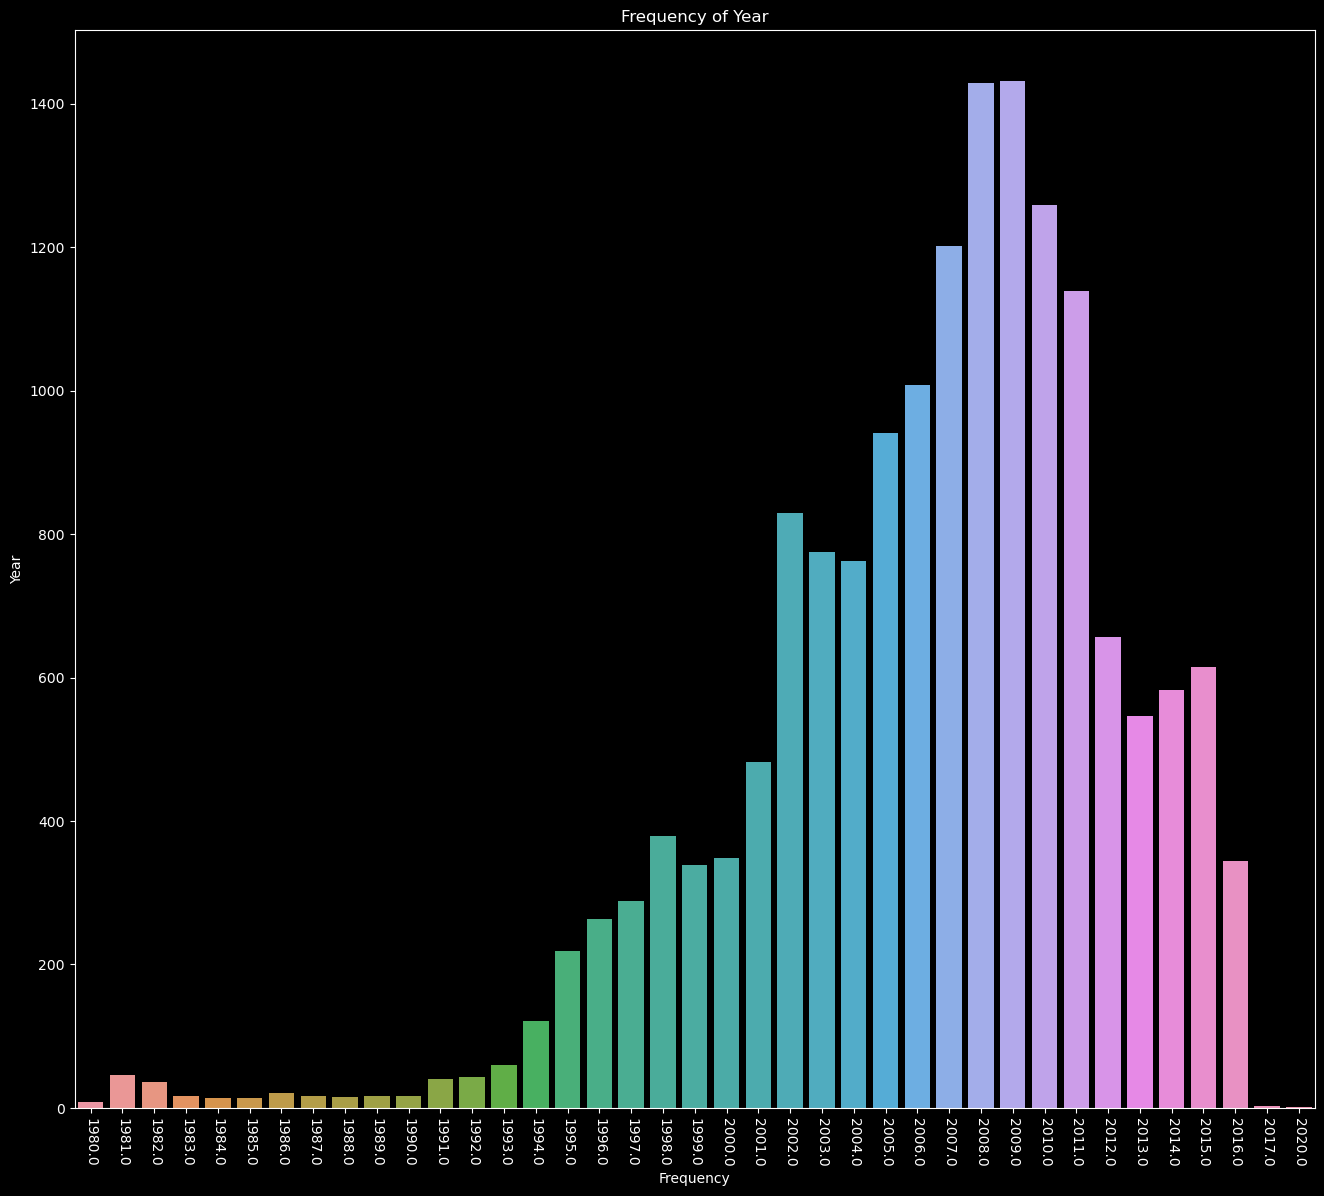

In [4]:
#count plot of year to see the distribution
plt.figure(figsize=(16,14))
sns.countplot("Year", data = df)
plt.xlabel("Frequency")
plt.ylabel("Year")
plt.title("Frequency of Year")
plt.xticks(rotation= -90)

Text(0.5, 1.0, 'Year vs Global_Sales scatter-plot')

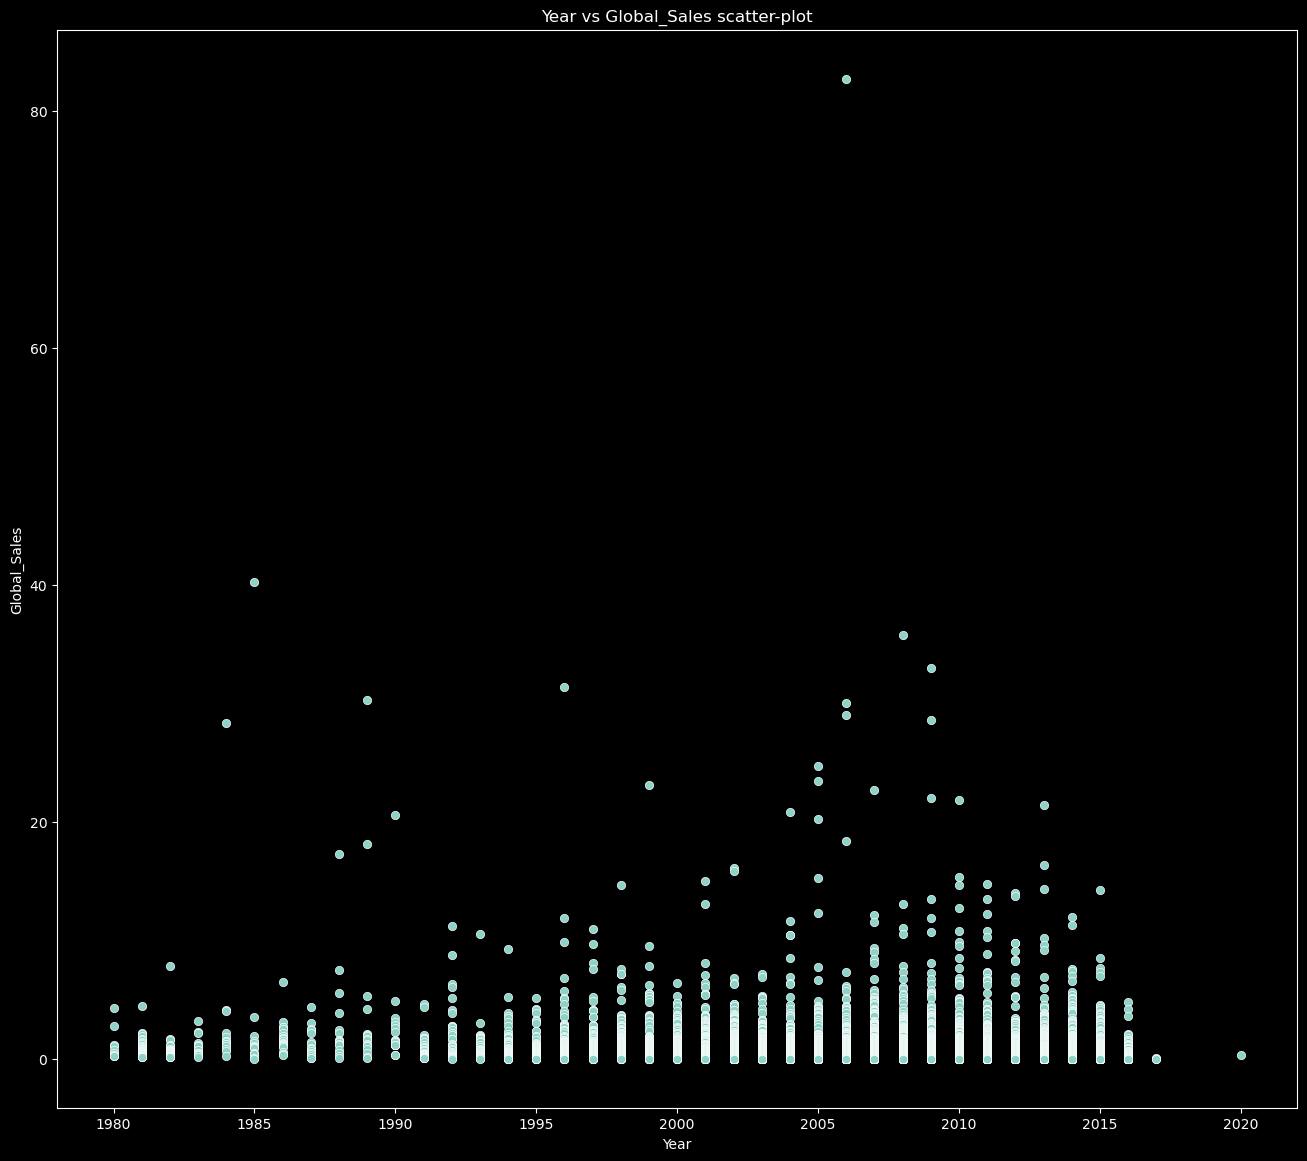

In [5]:
#scatter plot of year and global_sales variable
plt.figure(figsize=(16,14))
sns.scatterplot(x="Year", y="Global_Sales", data=df)
plt.title("Year vs Global_Sales scatter-plot")

In [6]:
#Observation -- in each year there have some global sales but 2018 and 2019 ther is no gloab sales.

Text(0.5, 1.0, 'Year vs Genre scatter-plot')

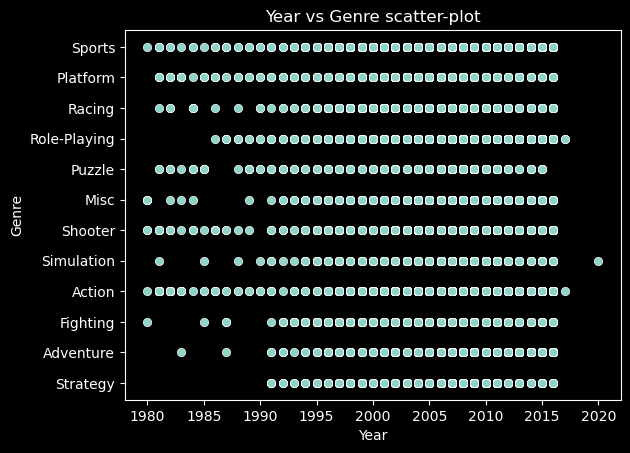

In [7]:
#Scatterplot of Genre and year
sns.scatterplot(x="Year", y="Genre", data=df)
plt.title("Year vs Genre scatter-plot")

In [8]:
#From above plot we can see in 2020 only simulation game was published 
#so when genre = simulation then then i will fill them with 2020 
#except simulation all genre will be fill with mean value fo year variable

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

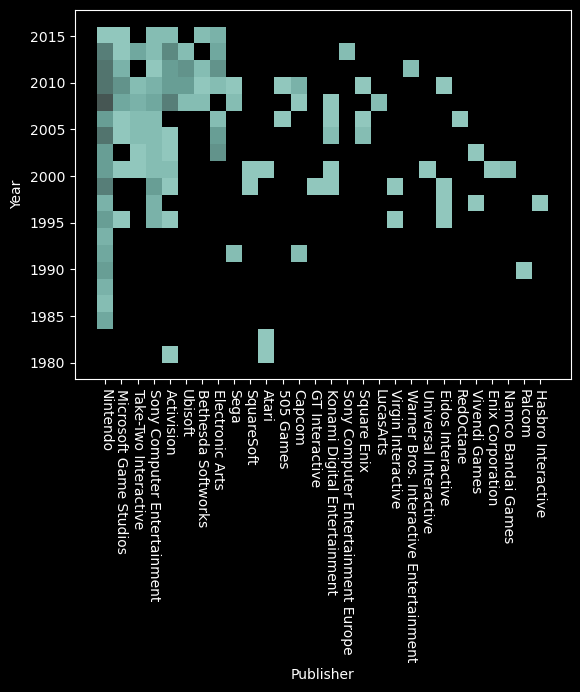

In [9]:
a=df.iloc[:300,3:6]
sns.histplot(x="Publisher", y="Year", bins=20, kde=True, data=a)
plt.xticks(rotation= -90)

In [10]:
#Fixing year missing values
tmp = (df.Genre == "Simulation") & (pd.isna(df.Year))                                   #from genre
df.Year[tmp] = 2020
print("Fixed Year missing values:" , tmp.sum())

tmp = (df.Publisher == "Hasbro Interactive") & (pd.isna(df.Year))                       #from publisher
df.Year[tmp] = 1997
print("Fixed Year missing values:" , tmp.sum())
 
tmp = (df.Publisher == "Placom") & (pd.isna(df.Year))                                   #from publisher
df.Year[tmp] = 1990
print("Fixed Year missing values:" , tmp.sum())

tmp = (df.Publisher == "Namco Bandai Games") & (pd.isna(df.Year))                        #from publisher
df.Year[tmp] = 2001
print("Fixed Year missing values:" , tmp.sum())

tmp = (df.Publisher == "Enix Corporation") & (pd.isna(df.Year))                         #from publisher
df.Year[tmp] = 2001
print("Fixed Year missing values:" , tmp.sum())

tmp = (df.Publisher == "LucaasArts") & (pd.isna(df.Year))                               #from publisher
df.Year[tmp] = 2008
print("Fixed Year missing values:" , tmp.sum())

tmp = (df.Publisher == "Universal Interactive") & (pd.isna(df.Year))                    #from publisher
df.Year[tmp] = 2000 
print("Fixed Year missing values:" , tmp.sum())

tmp = (df.Publisher == "RedOctane") & (pd.isna(df.Year))                                #from publisher
df.Year[tmp] = 2006
print("Fixed Year missing values:" , tmp.sum())

tmp = (df.Publisher == "Warner Bros. Interactive Entertainment") & (pd.isna(df.Year))   #from publisher
df.Year[tmp] = 2012
print("Fixed Year missing values:" , tmp.sum())

tmp = (df.Publisher == "Sony Computer Entertainment Europe") & (pd.isna(df.Year))       #from publisher
df.Year[tmp] = 2014
print("Fixed Year missing values:" , tmp.sum())

tmp = (df.Publisher == "GT Interactive") & (pd.isna(df.Year))                           #from publisher
df.Year[tmp] = 1999
print("Fixed Year missing values:" , tmp.sum())

tmp = (df.Genre == "Sports") & (pd.isna(df.Year))                                       #from genre
df.Year[tmp] = df.Year.mean()
print("Fixed year missing values:" , tmp.sum()) 

tmp = (df.Genre == "Action") & (pd.isna(df.Year))                                       #from genre
df.Year[tmp] = df.Year.mean()
print("Fixed year missing values:" , tmp.sum()) 

tmp = (df.Genre == "Misc") & (pd.isna(df.Year))                                         #from genre
df.Year[tmp] = df.Year.mean()
print("Fixed year missing values:" , tmp.sum()) 

tmp = (df.Genre == "Shooter") & (pd.isna(df.Year))                                      #from genre
df.Year[tmp] = df.Year.mean() 
print("Fixed year missing values:" , tmp.sum())

tmp = (df.Genre == "Role-Playing") & (pd.isna(df.Year))                                  #from genre
df.Year[tmp] = df.Year.mean()
print("Fixed year missing values:" , tmp.sum()) 

tmp = (df.Genre == "Adventure") & (pd.isna(df.Year))                                     #from genre
df.Year[tmp] = df.Year.mean()
print("Fixed year missing values:" , tmp.sum()) 

tmp = (df.Genre == "Racing") & (pd.isna(df.Year))                                        #from genre
df.Year[tmp] = df.Year.mean()
print("Fixed year missing values:" , tmp.sum()) 

tmp = (df.Genre == "Platform") & (pd.isna(df.Year))                                      #from genre
df.Year[tmp] = df.Year.mean()
print("Fixed year missing values:" , tmp.sum()) 

tmp = (df.Genre == "Fighting") & (pd.isna(df.Year))                                      #from genre
df.Year[tmp] = df.Year.mean()
print("Fixed year missing values:" , tmp.sum()) 

tmp = (df.Genre == "Strategy") & (pd.isna(df.Year))                                      #from genre
df.Year[tmp] = df.Year.mean()
print("Fixed year missing values:" , tmp.sum()) 

tmp = (df.Genre == "Puzzle")&(pd.isna(df.Year))                                          #from genre
df.Year[tmp] = df.Year.mean()
print("Fixed year missing values:" , tmp.sum()) 

print("Now Year variable missing value is: ",df.Year.isnull().sum())

Fixed Year missing values: 16
Fixed Year missing values: 0
Fixed Year missing values: 0
Fixed Year missing values: 3
Fixed Year missing values: 0
Fixed Year missing values: 0
Fixed Year missing values: 1
Fixed Year missing values: 0
Fixed Year missing values: 15
Fixed Year missing values: 0
Fixed Year missing values: 0
Fixed year missing values: 41
Fixed year missing values: 46
Fixed year missing values: 29
Fixed year missing values: 27
Fixed year missing values: 17
Fixed year missing values: 10
Fixed year missing values: 23
Fixed year missing values: 10
Fixed year missing values: 12
Fixed year missing values: 10
Fixed year missing values: 11
Now Year variable missing value is:  0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'Nintendo'),
  Text(1, 0, 'Microsoft Game Studios'),
  Text(2, 0, 'Take-Two Interactive'),
  Text(3, 0, 'Sony Computer Entertainment'),
  Text(4, 0, 'Activision'),
  Text(5, 0, 'Ubisoft'),
  Text(6, 0, 'Bethesda Softworks'),
  Text(7, 0, 'Electronic Arts'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'SquareSoft'),
  Text(10, 0, 'Atari'),
  Text(11, 0, '505 Games'),
  Text(12, 0, 'Capcom'),
  Text(13, 0, 'GT Interactive'),
  Text(14, 0, 'Konami Digital Entertainment'),
  Text(15, 0, 'Sony Computer Entertainment Europe'),
  Text(16, 0, 'Square Enix'),
  Text(17, 0, 'LucasArts'),
  Text(18, 0, 'Virgin Interactive'),
  Text(19, 0, 'Warner Bros. Interactive Entertainment'),
  Text(20, 0, 'Universal Interactive'),
  Text(21, 0, 'Eidos Interactive'),
  Text(22, 0, 'RedOctane'),
  Text(23, 0, 'Vivendi Games'),
  Text(24, 0, 'Enix Corporation'),
  Text(25, 0, 'N

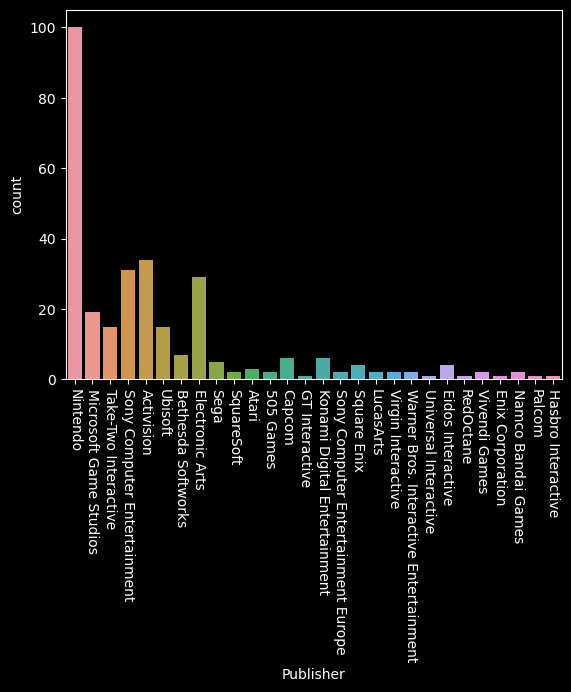

In [11]:
#Missing values for publisher--->
a=df.iloc[:300,3:6]
sns.countplot('Publisher',data=a)                #publisher variable top 300 rows countplot
plt.xticks(rotation= -90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

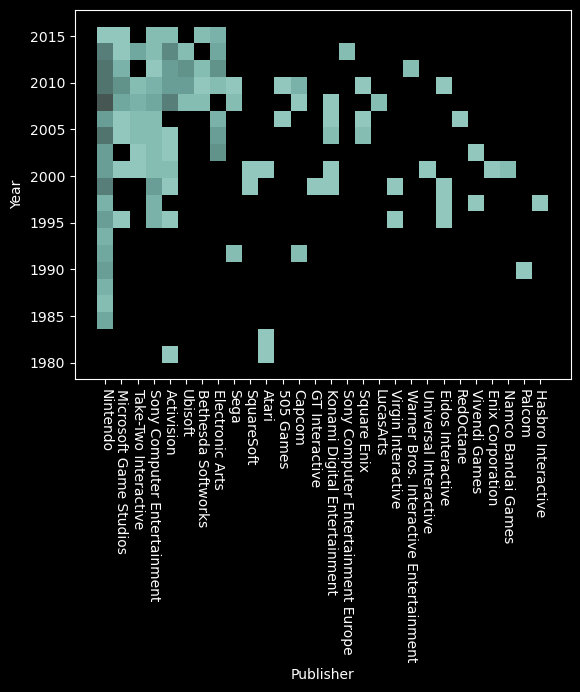

In [12]:
sns.histplot(x="Publisher", y="Year", bins=20, kde=True, data=a)
plt.xticks(rotation= -90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

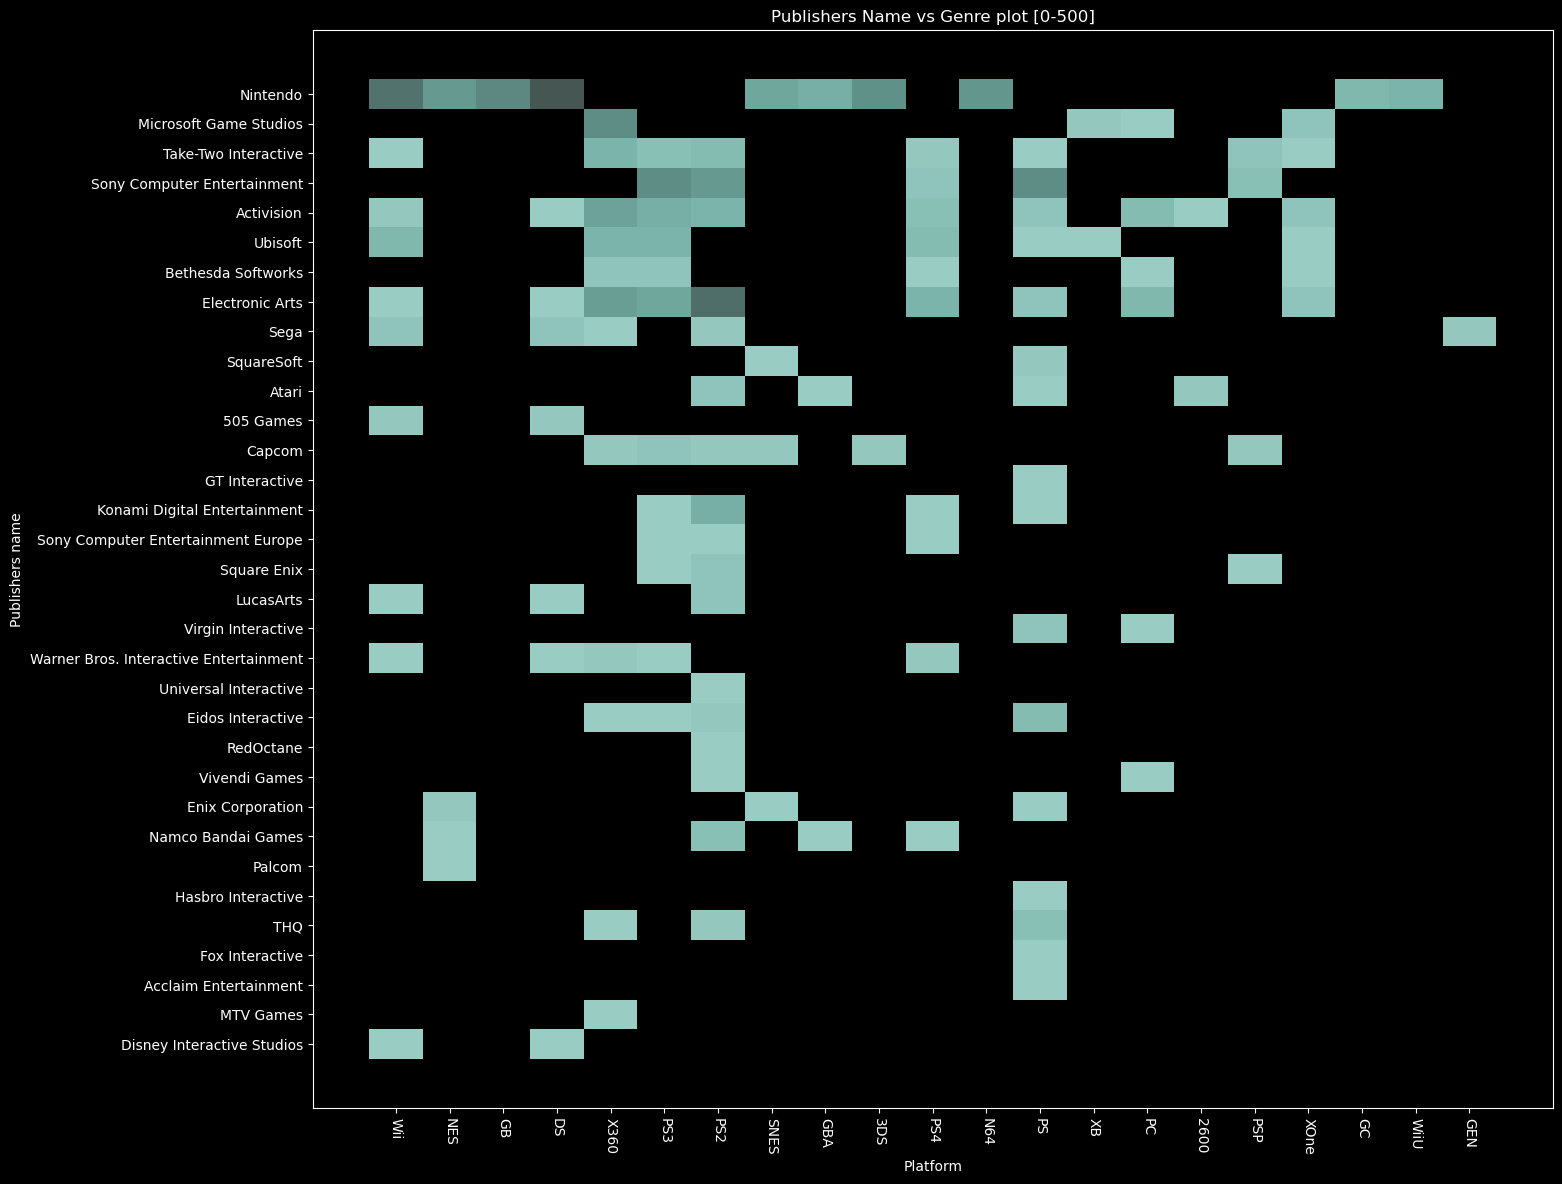

In [13]:
#Histplot of platform and publisher only first 500 rows-->

plt.figure(figsize=(16,14))
b=df.iloc[:500,:6]
#plot
sns.histplot(x="Platform",y="Publisher", data=b, bins=20,kde=True)
plt.xlabel("Platform")
plt.ylabel("Publishers name")
plt.title("Publishers Name vs Genre plot [0-500]")
plt.xticks(rotation=-90)

In [14]:
#observation --
#on GEN platform only Sega publisher published their game
#on GC and Wiiu platform used by Nintendo
#N64 platfor only used by Nintendo
#GB platform only used by Nintendo

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

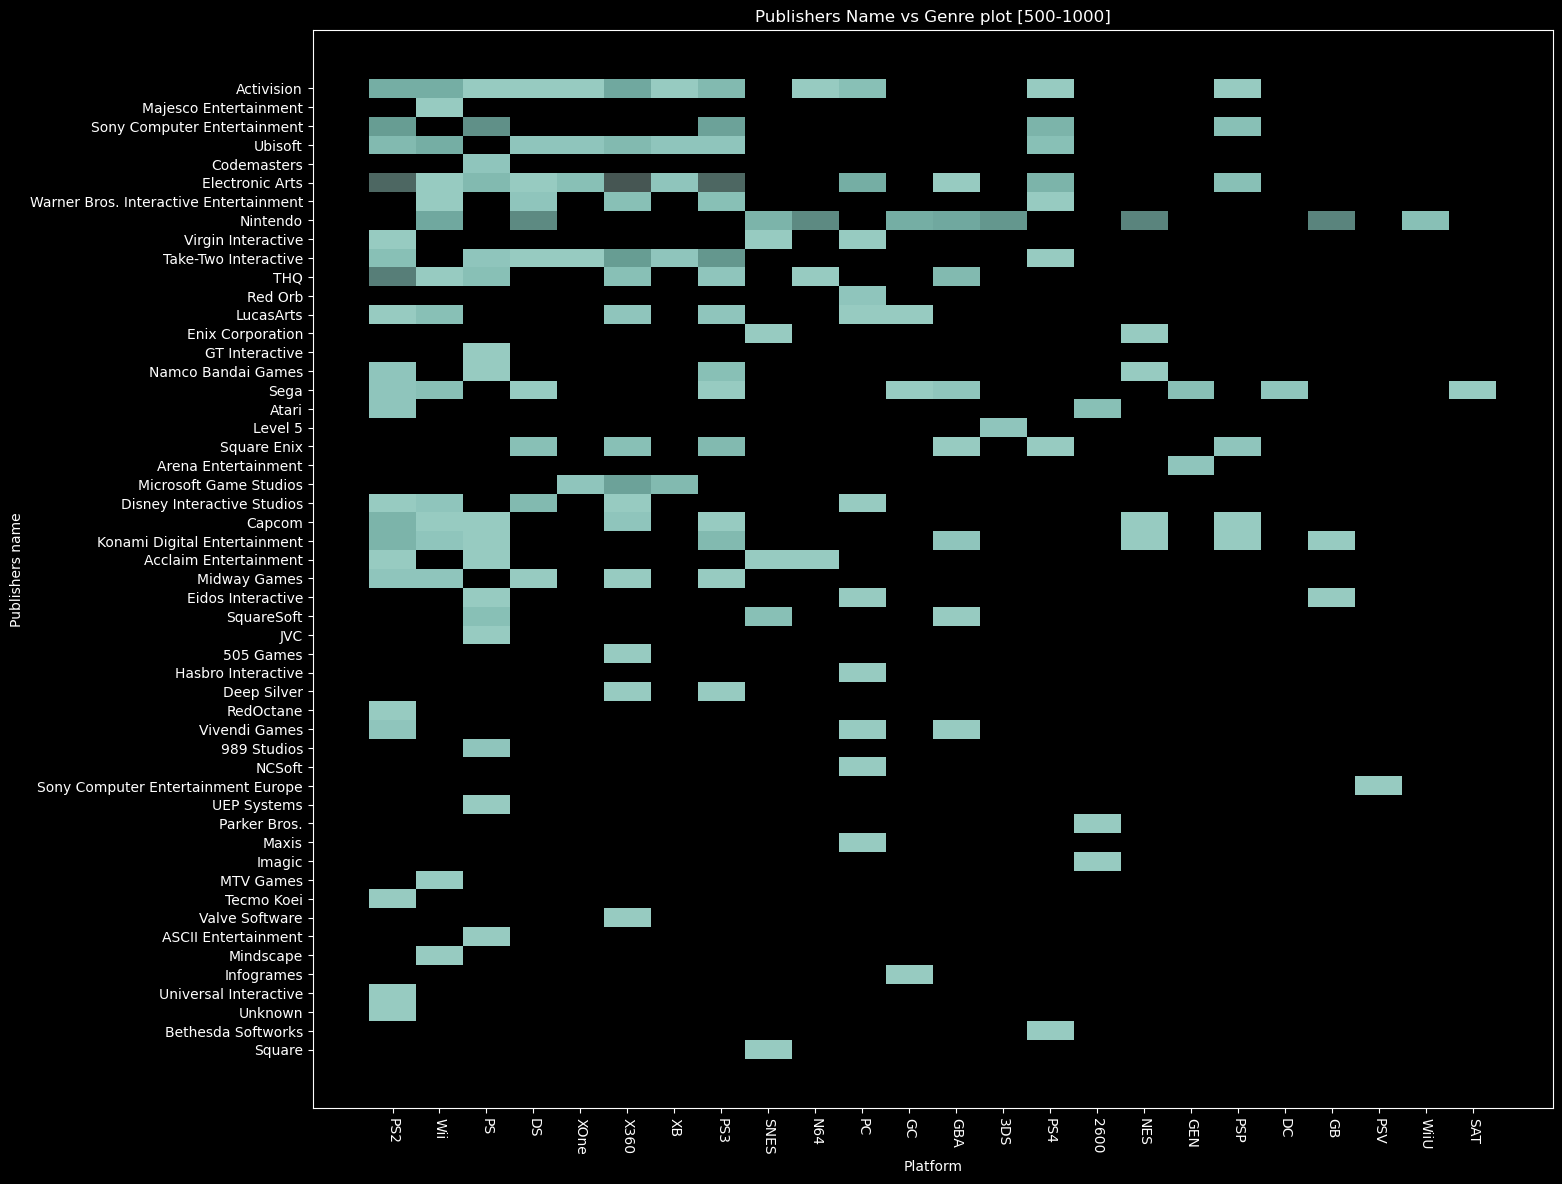

In [15]:
#plot of 500 to 1000 rows
plt.figure(figsize=(16,14))
b=df.iloc[500:1000,:6]
sns.histplot(x="Platform",y="Publisher", data=b, bins=20,kde=True)
plt.xlabel("Platform")
plt.ylabel("Publishers name")
plt.title("Publishers Name vs Genre plot [500-1000]")
plt.xticks(rotation=-90)

In [16]:
#observation2--
#SAT paltform only used by Sega publisher
#Wiiu platform only used by Nintendo
#PSv platform only used by Sony Computer Entertainment Europe
#DC platform only used by Sega

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

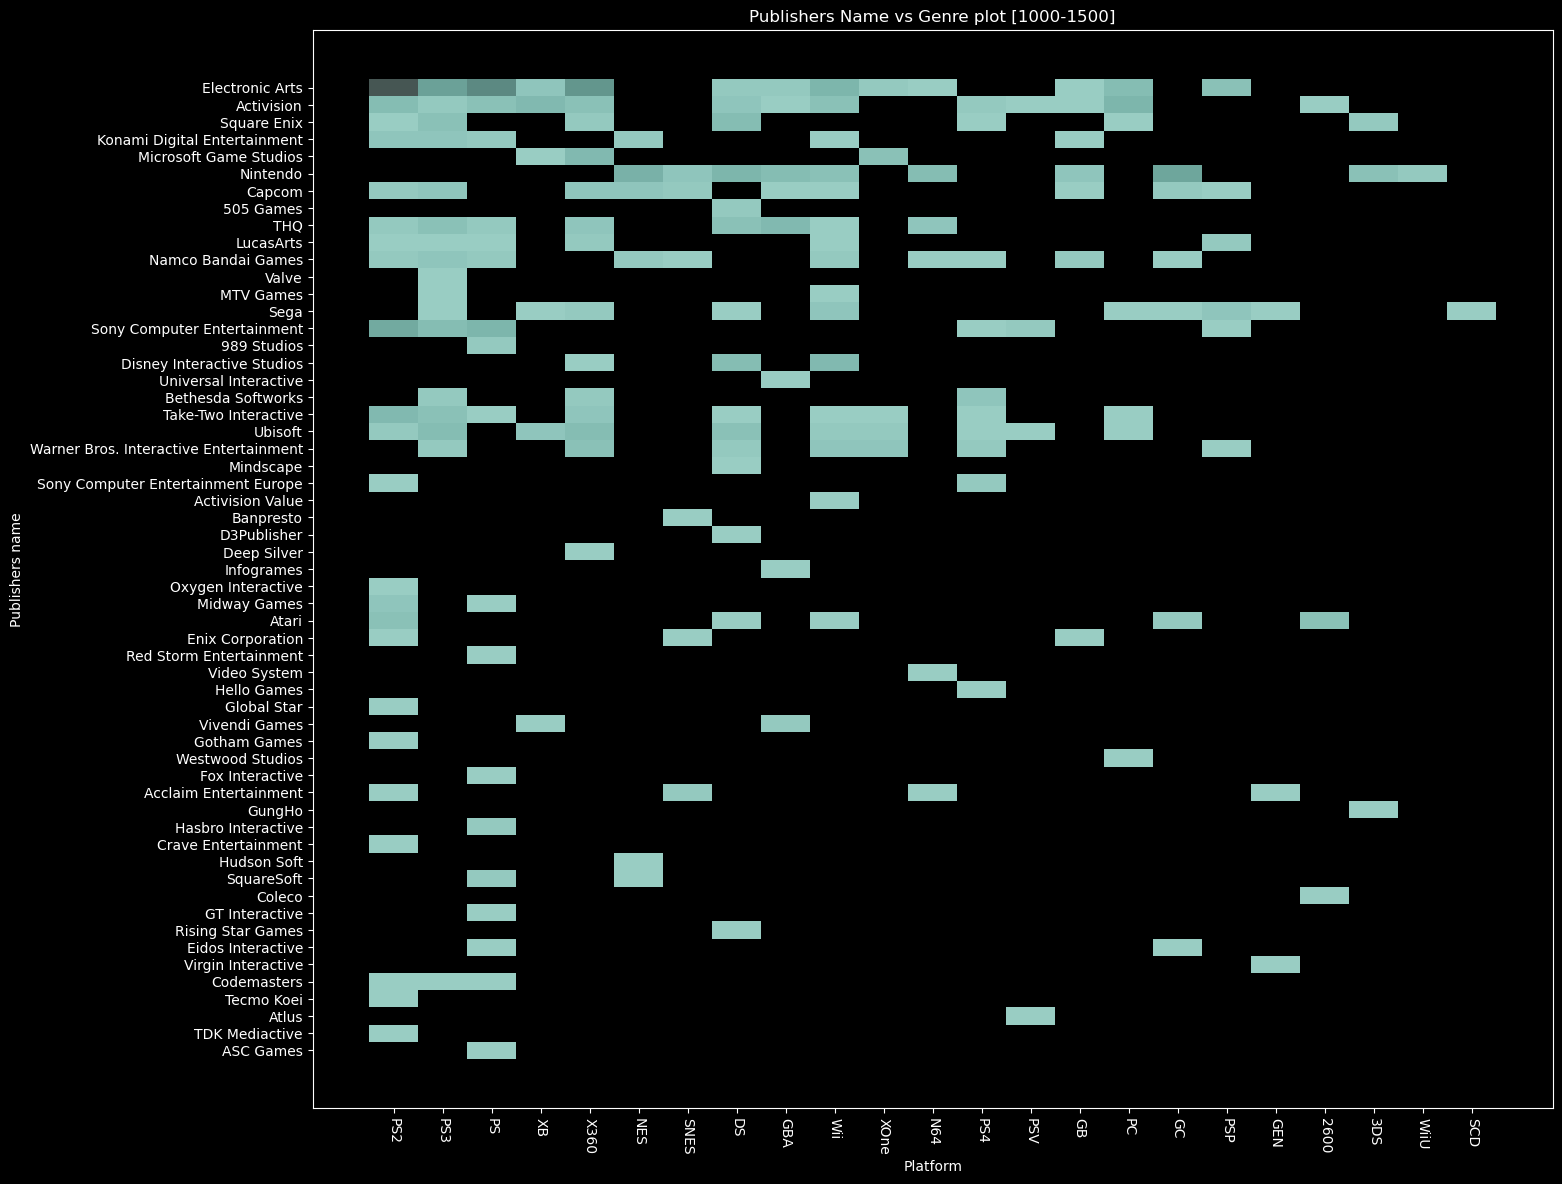

In [17]:
#plot from 1000 rows to 1500 rows
plt.figure(figsize=(16,14))
b=df.iloc[1000:1500,:6]
sns.histplot(x="Platform",y="Publisher", data=b, bins=20,kde=True)
plt.xlabel("Platform")
plt.ylabel("Publishers name")
plt.title("Publishers Name vs Genre plot [1000-1500]")
plt.xticks(rotation=-90)

In [18]:
#observation3--
#SCD platform used only by Sega

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

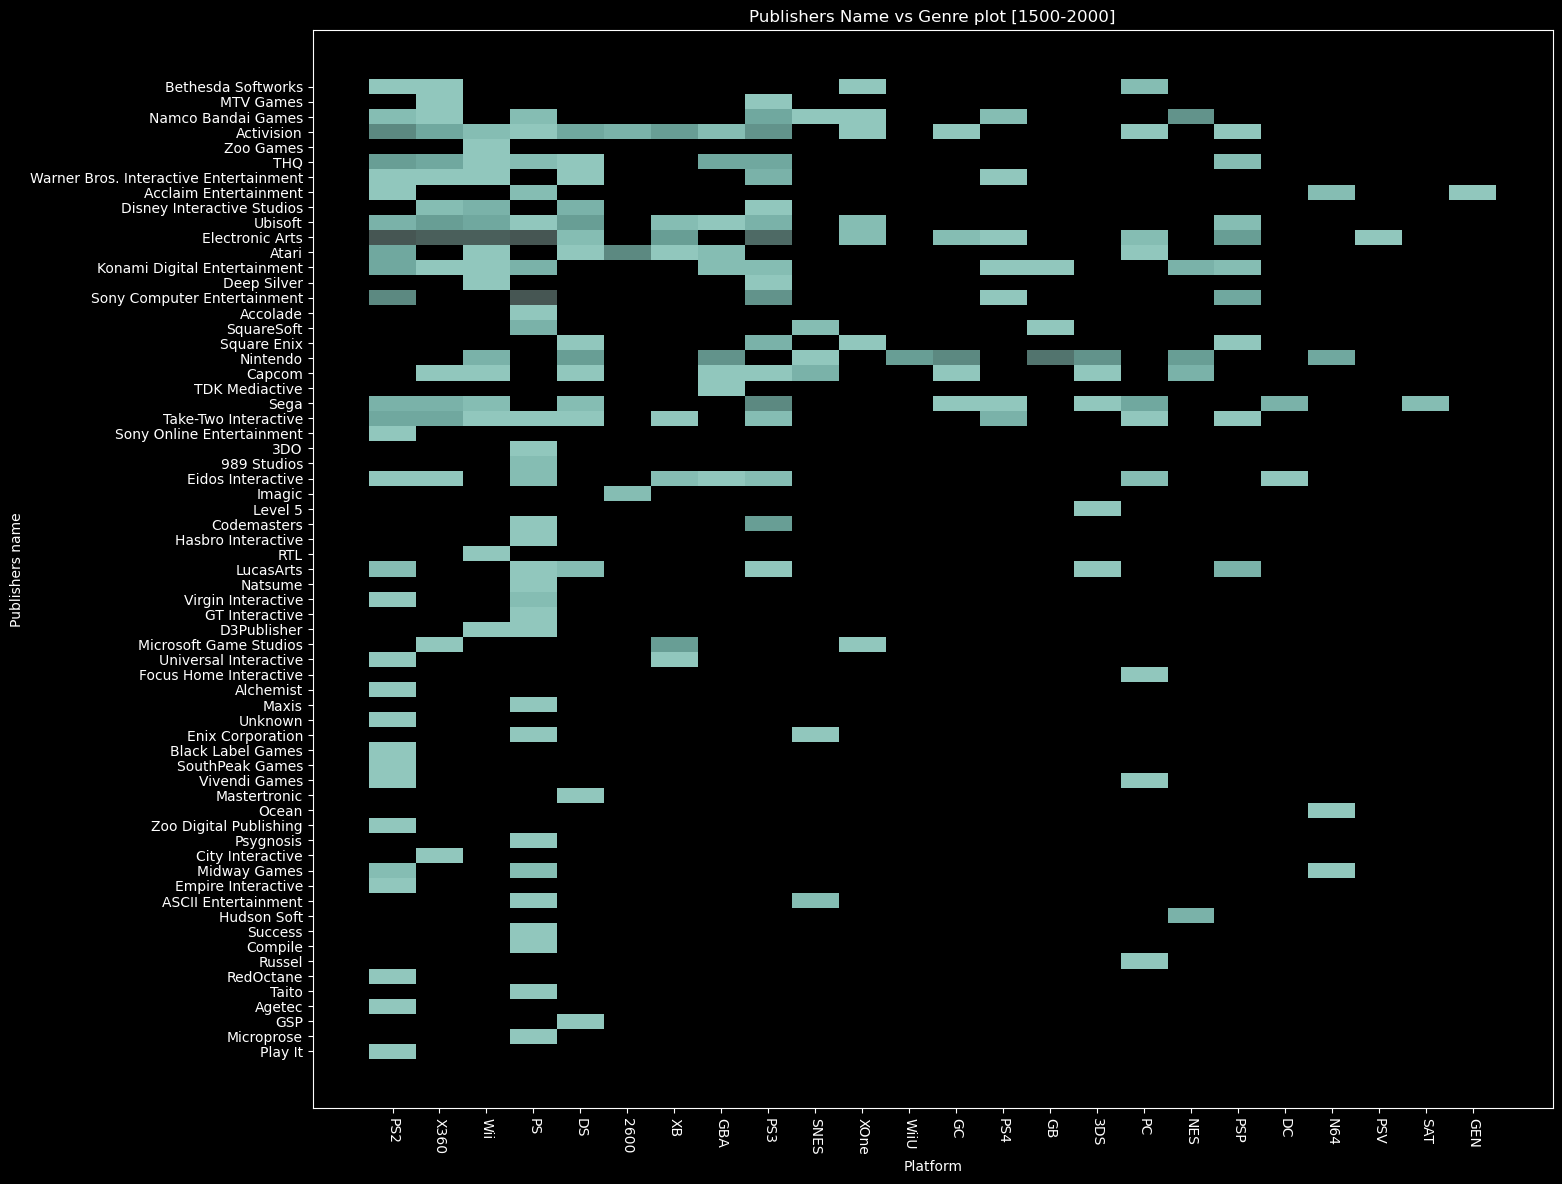

In [19]:
#plot rows 1500 to 2000
plt.figure(figsize=(16,14))
b=df.iloc[1500:2000,:6]
sns.histplot(x="Platform",y="Publisher", data=b, bins=20,kde=True)
plt.xlabel("Platform")
plt.ylabel("Publishers name")
plt.title("Publishers Name vs Genre plot [1500-2000]")
plt.xticks(rotation=-90)

In [20]:
#Observation--
#GEN platform only used by Acclaim Entertainment
#SAT platform used by Sega
#PSV platform used by Electronic Arts

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

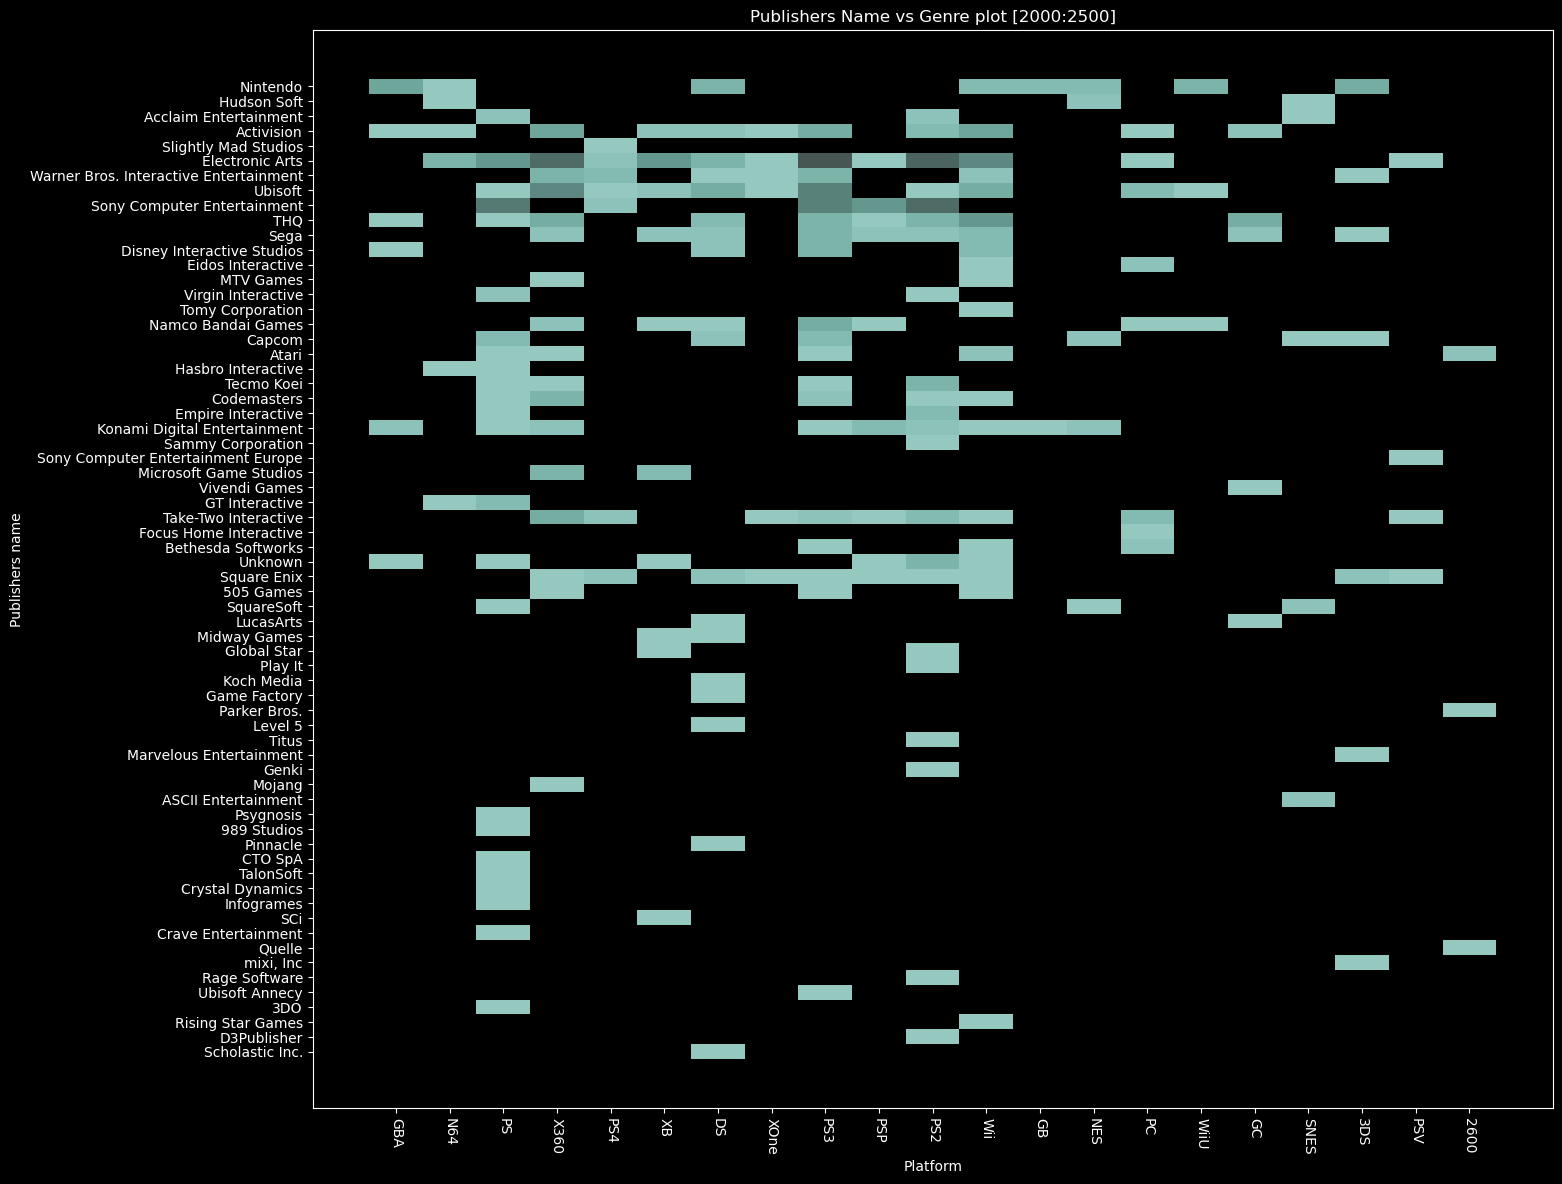

In [21]:
#plot 2000 rows to 2500 rows
plt.figure(figsize=(16,14))
b=df.iloc[2000:2500,:6]
sns.histplot(x="Platform",y="Publisher", data=b, bins=20,kde=True)
plt.xlabel("Platform")
plt.ylabel("Publishers name")
plt.title("Publishers Name vs Genre plot [2000:2500]")
plt.xticks(rotation=-90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

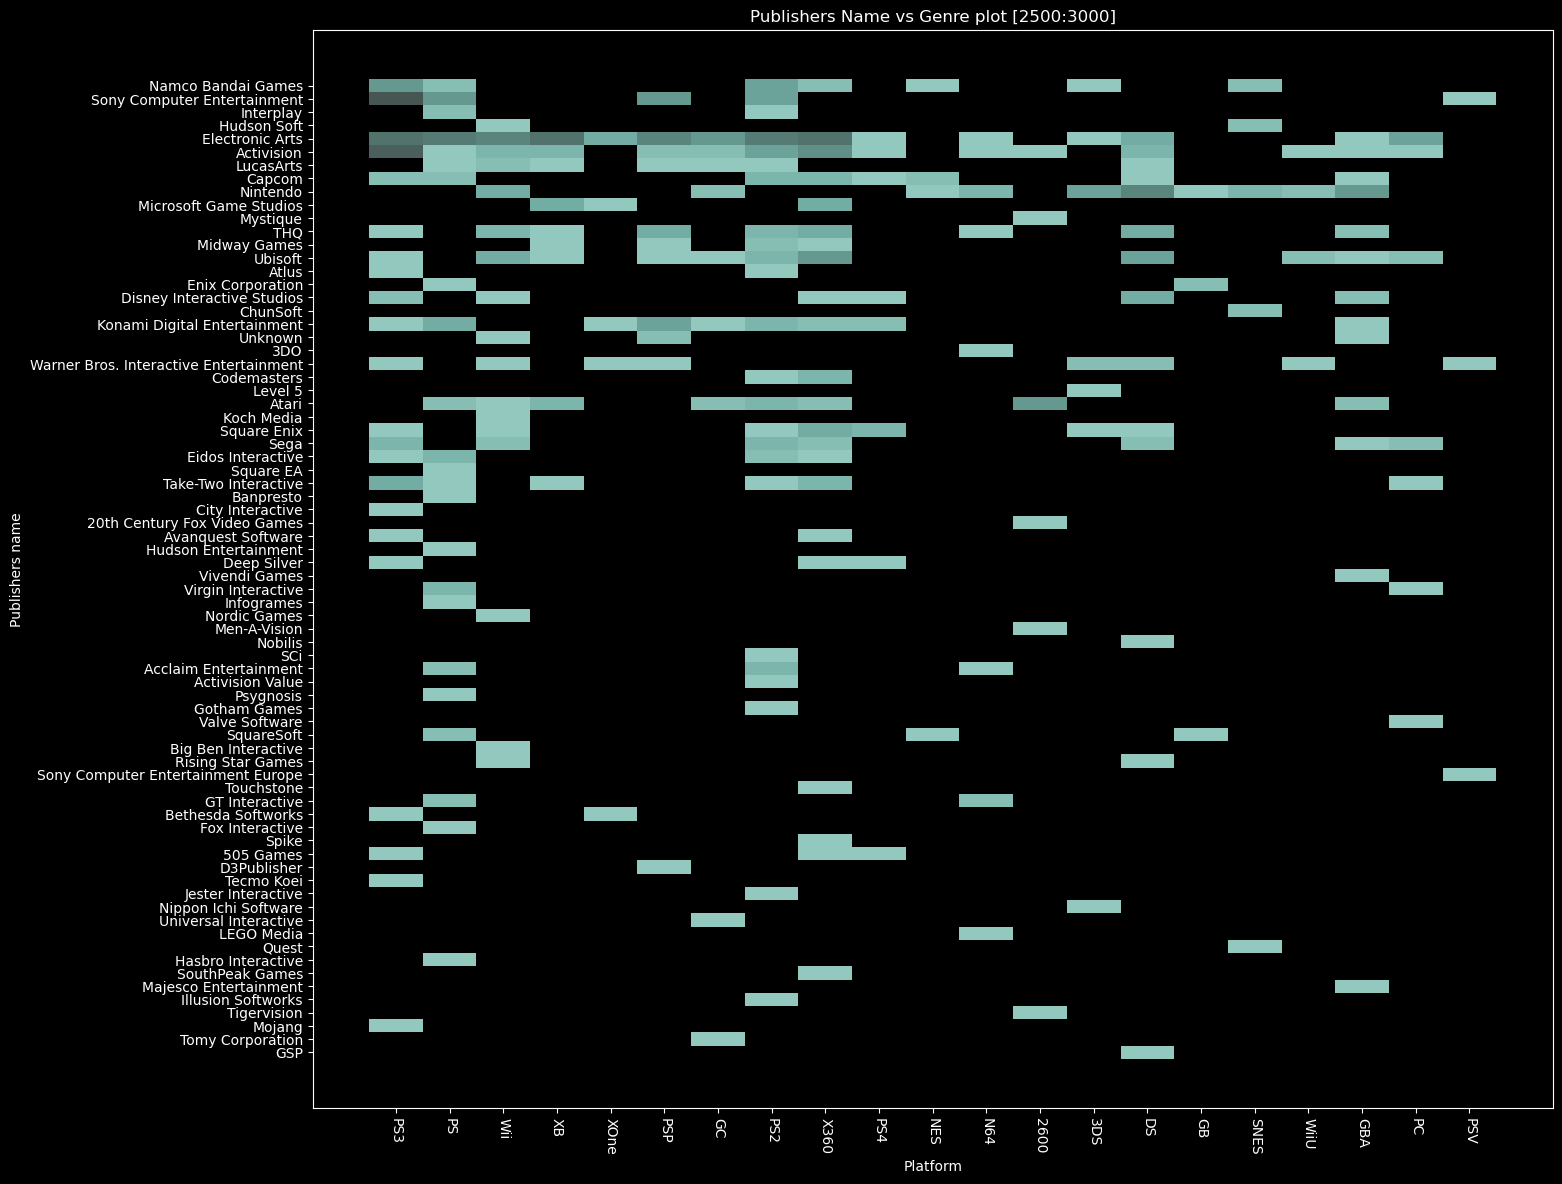

In [22]:
#Plot 2500 to 3000 rows
plt.figure(figsize=(16,14))
b=df.iloc[2500:3000,:6]
sns.histplot(x="Platform",y="Publisher", data=b, bins=20,kde=True)
plt.xlabel("Platform")
plt.ylabel("Publishers name")
plt.title("Publishers Name vs Genre plot [2500:3000]")
plt.xticks(rotation=-90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

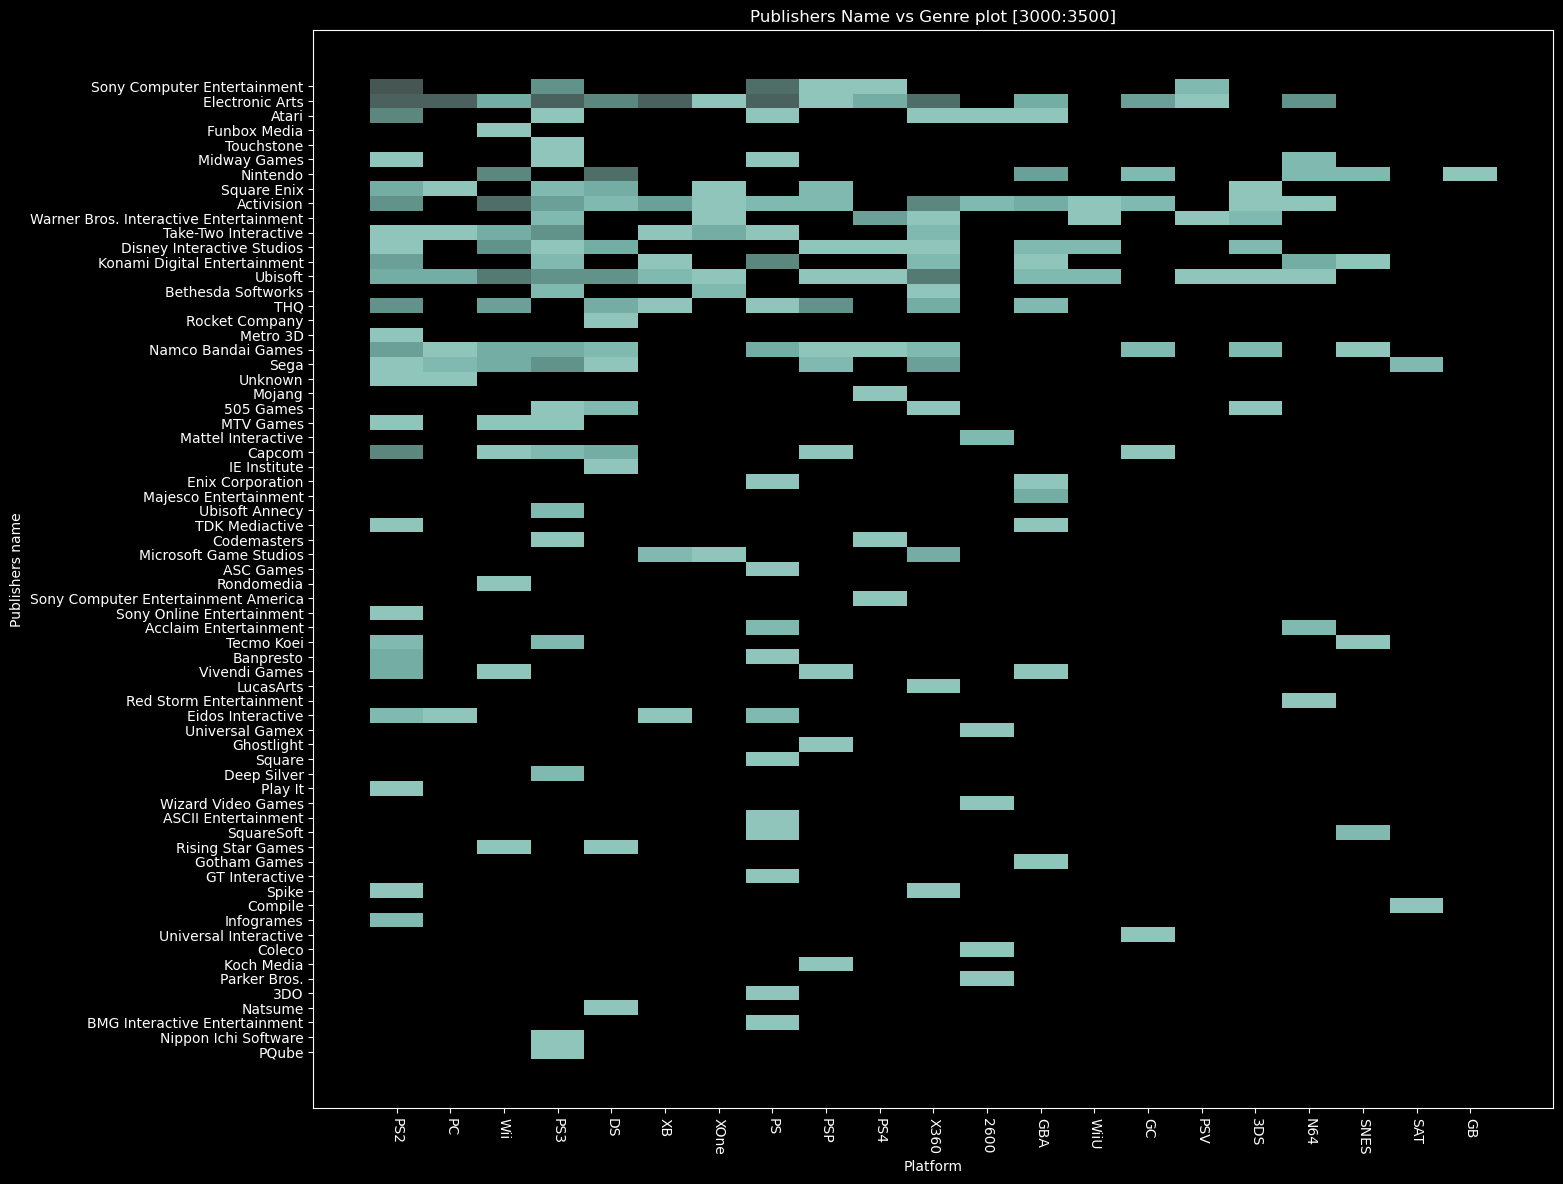

In [23]:
#Plot 3000 rows to 3500 rows
plt.figure(figsize=(16,14))
b=df.iloc[3000:3500,:6]
sns.histplot(x="Platform",y="Publisher", data=b, bins=20,kde=True)
plt.xlabel("Platform")
plt.ylabel("Publishers name")
plt.title("Publishers Name vs Genre plot [3000:3500]")
plt.xticks(rotation=-90)

In [24]:
#Observation--
#GB platform only used by Nintendo

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

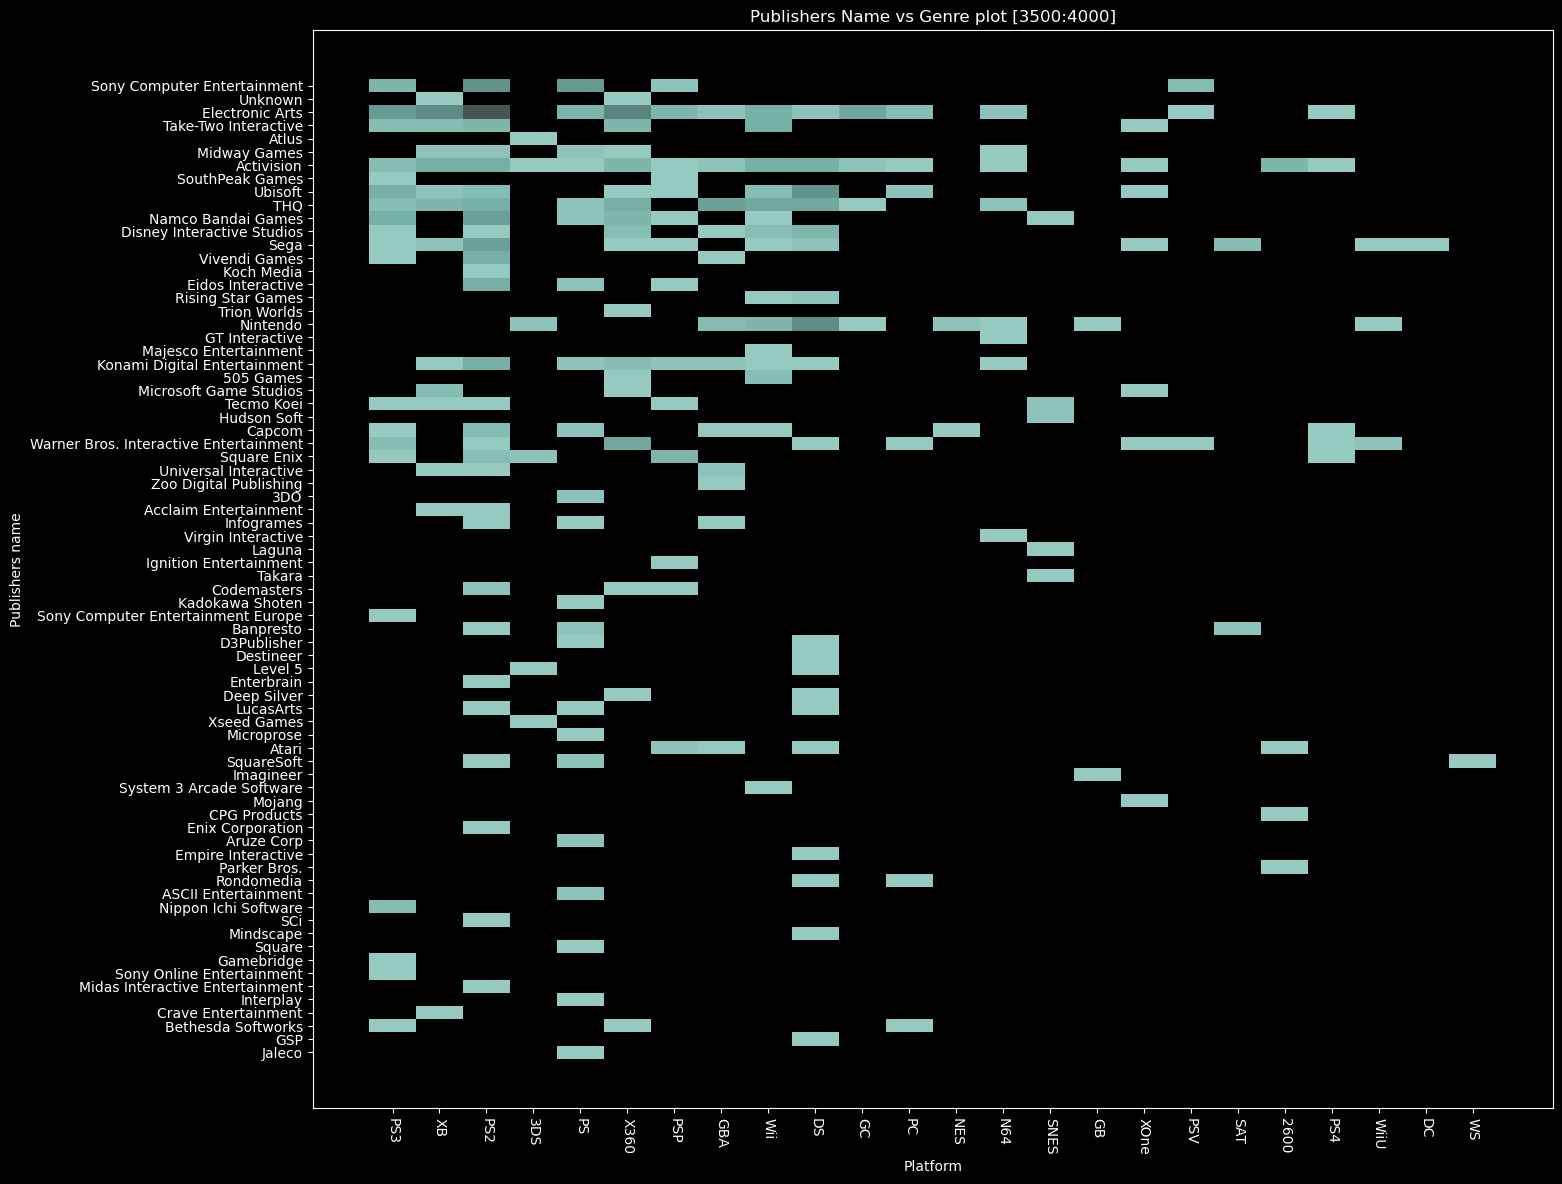

In [25]:
#Plot 3500 rows to 4000 rows
plt.figure(figsize=(16,14))
b=df.iloc[3500:4000,:6]
sns.histplot(x="Platform",y="Publisher", data=b, bins=20,kde=True)
plt.xlabel("Platform")
plt.ylabel("Publishers name")
plt.title("Publishers Name vs Genre plot [3500:4000]")
plt.xticks(rotation=-90)

In [26]:
#Observation-->
#WS platform only used by SquareSoft
#DC platform used by Sega publisher

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

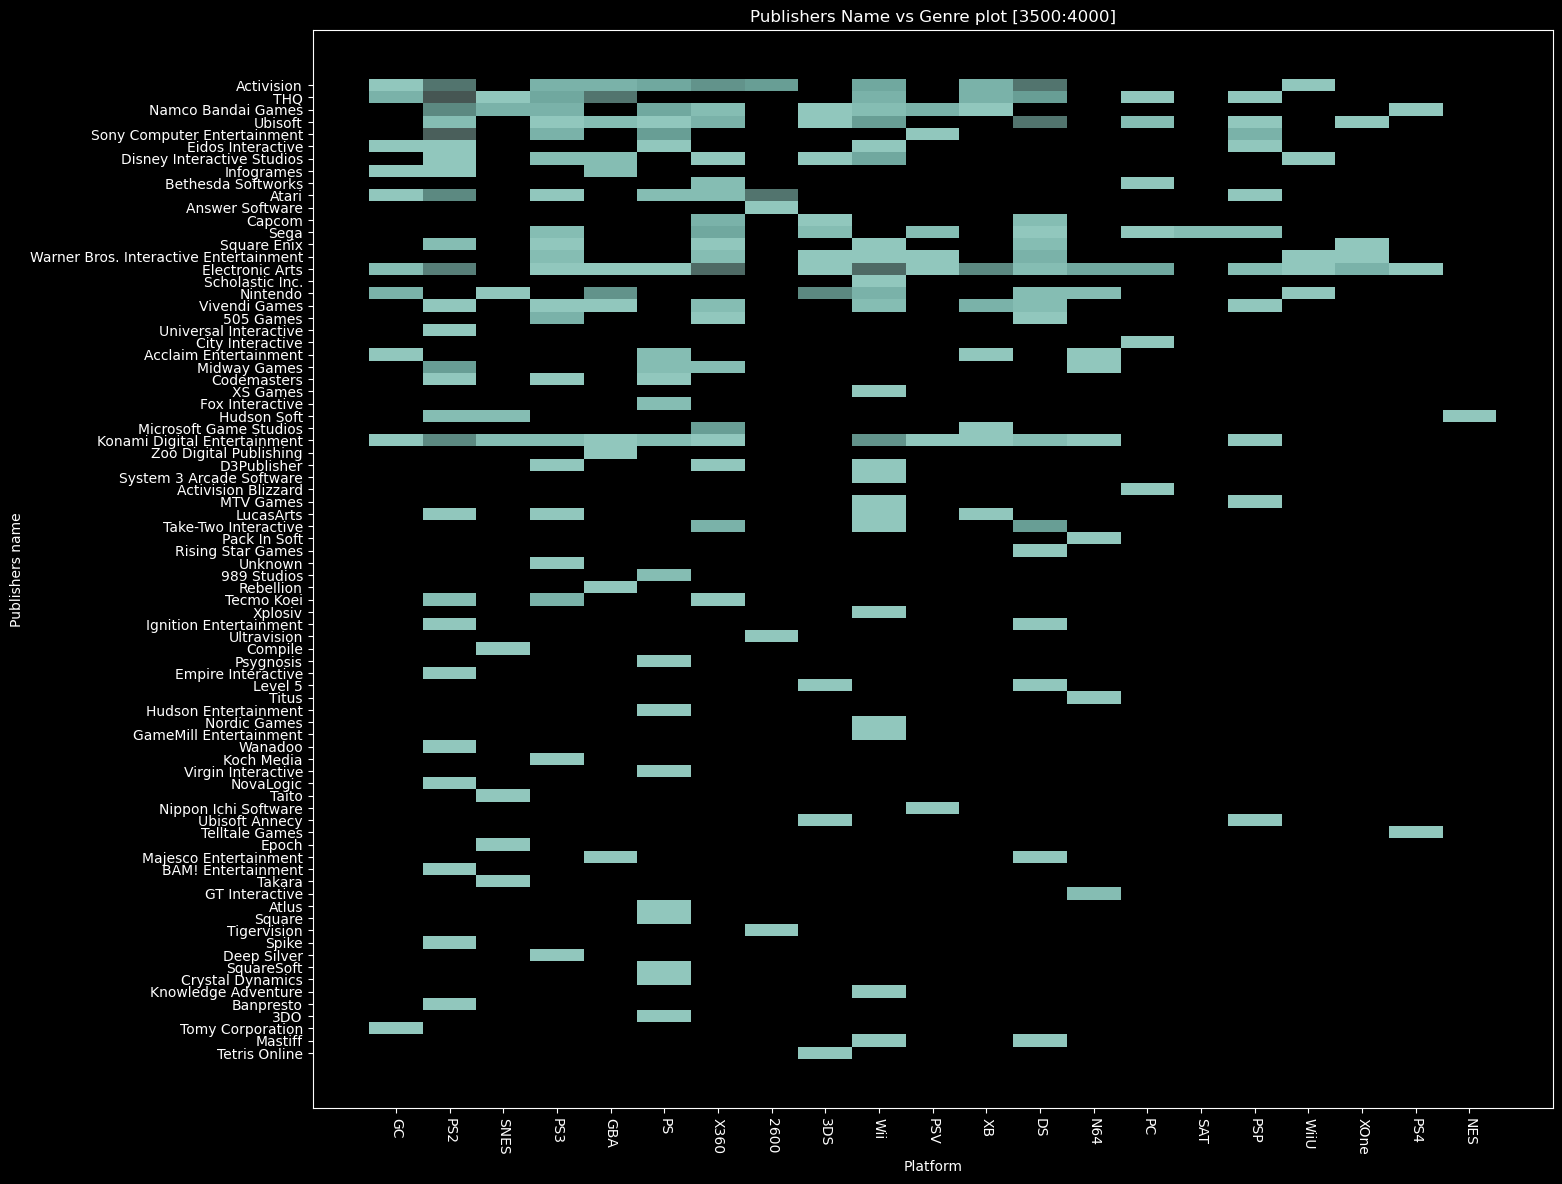

In [27]:
#Plot 4000 rows to 4500 rows
plt.figure(figsize=(16,14))
b=df.iloc[4000:4500,:6]
sns.histplot(x="Platform",y="Publisher", data=b, bins=20,kde=True)
plt.xlabel("Platform")
plt.ylabel("Publishers name")
plt.title("Publishers Name vs Genre plot [3500:4000]")
plt.xticks(rotation=-90)

In [28]:
#Observation-->
#NES platform only used by Hudson Soft
#SAT platform only used by Sega

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

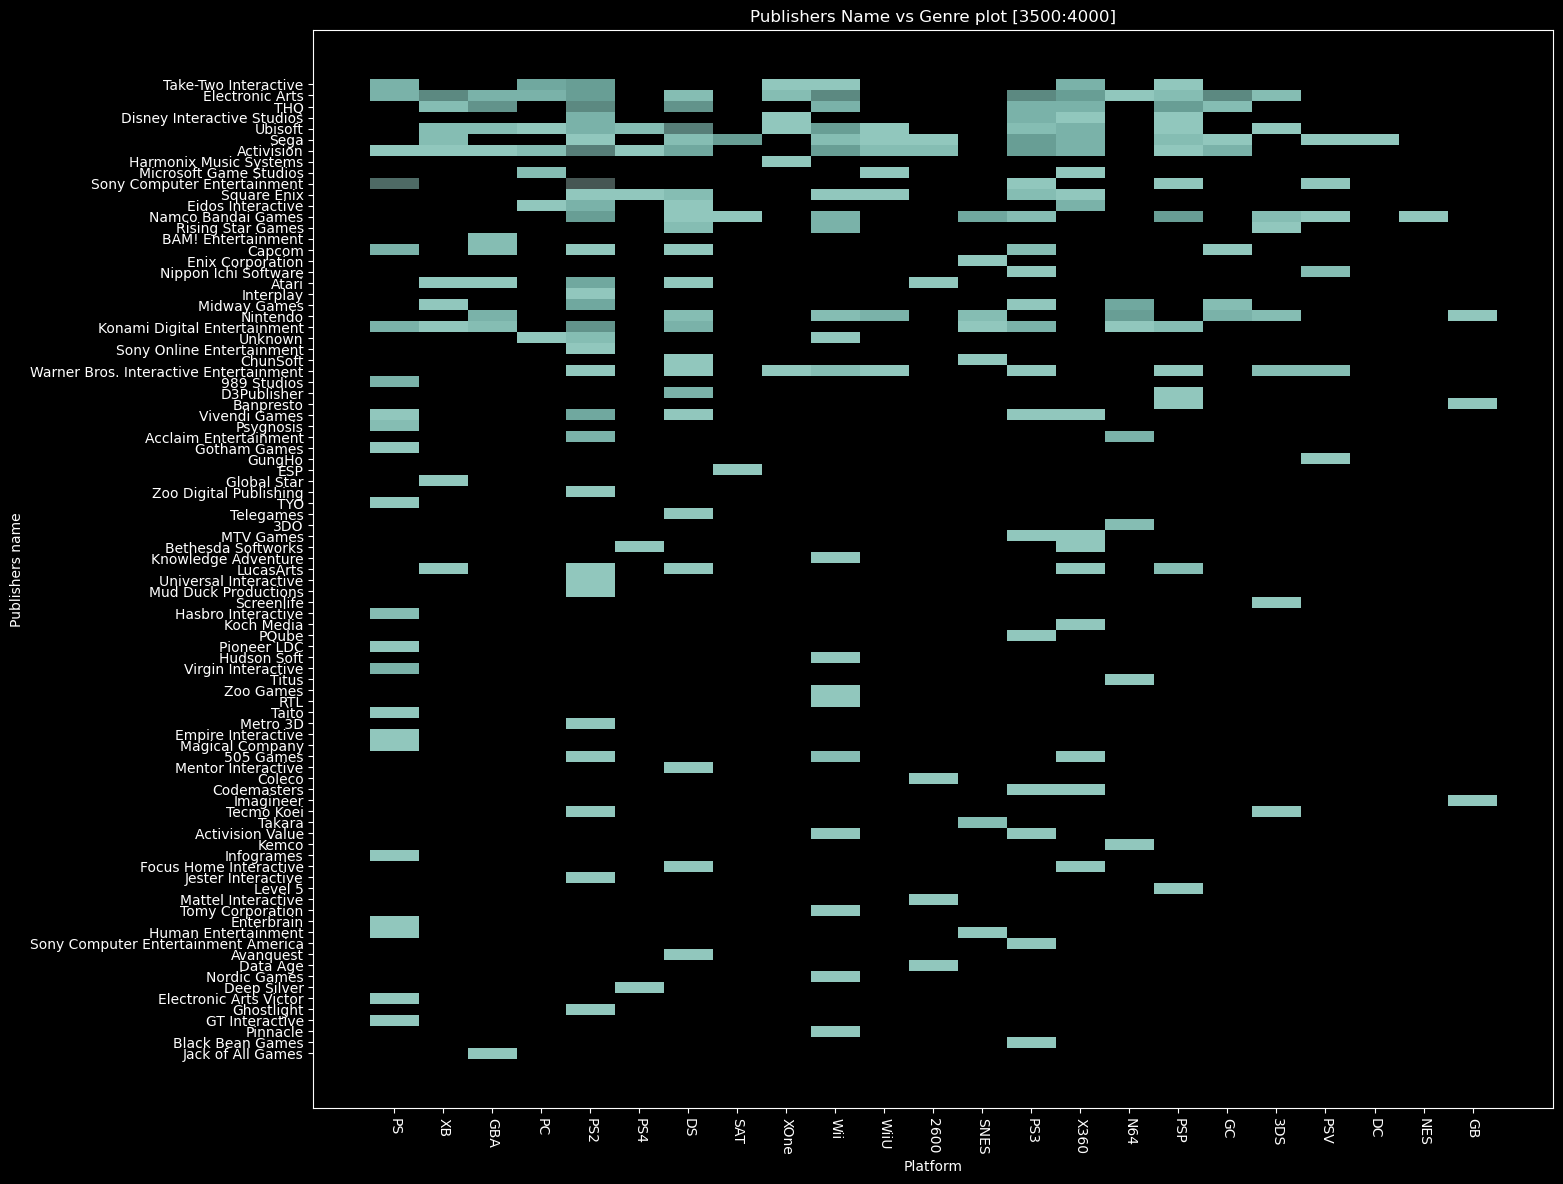

In [29]:
#Plot 4500 rows to 5000 rows
plt.figure(figsize=(16,14))
b=df.iloc[4500:5000,:6]
sns.histplot(x="Platform",y="Publisher", data=b, bins=20,kde=True)
plt.xlabel("Platform")
plt.ylabel("Publishers name")
plt.title("Publishers Name vs Genre plot [3500:4000]")
plt.xticks(rotation=-90)

In [30]:
#observation--
#NES platform used by Namco Bandal Games
#DC used by Sega

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

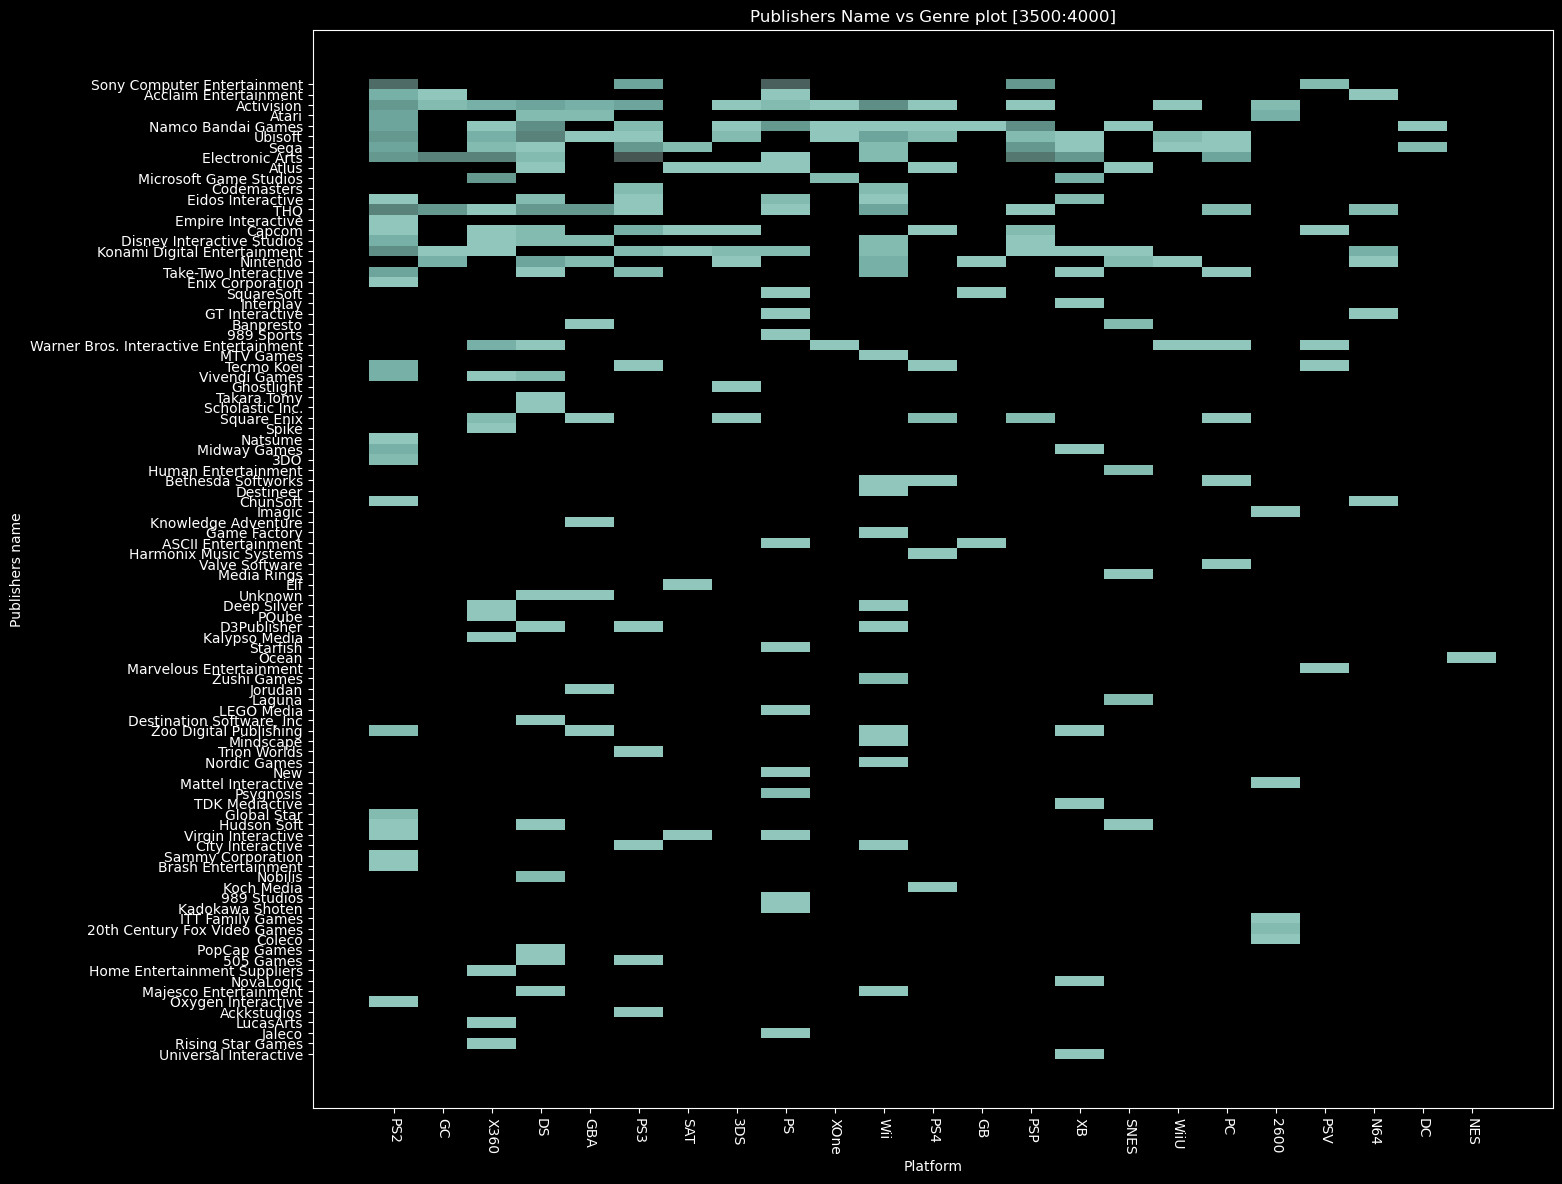

In [31]:
#Plot 5000 rows to 5500 rows
plt.figure(figsize=(16,14))
b=df.iloc[5000:5500,:6]
sns.histplot(x="Platform",y="Publisher", data=b, bins=20,kde=True)
plt.xlabel("Platform")
plt.ylabel("Publishers name")
plt.title("Publishers Name vs Genre plot [3500:4000]")
plt.xticks(rotation=-90)

In [32]:
#Observation--
#NES used bo Ocean

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

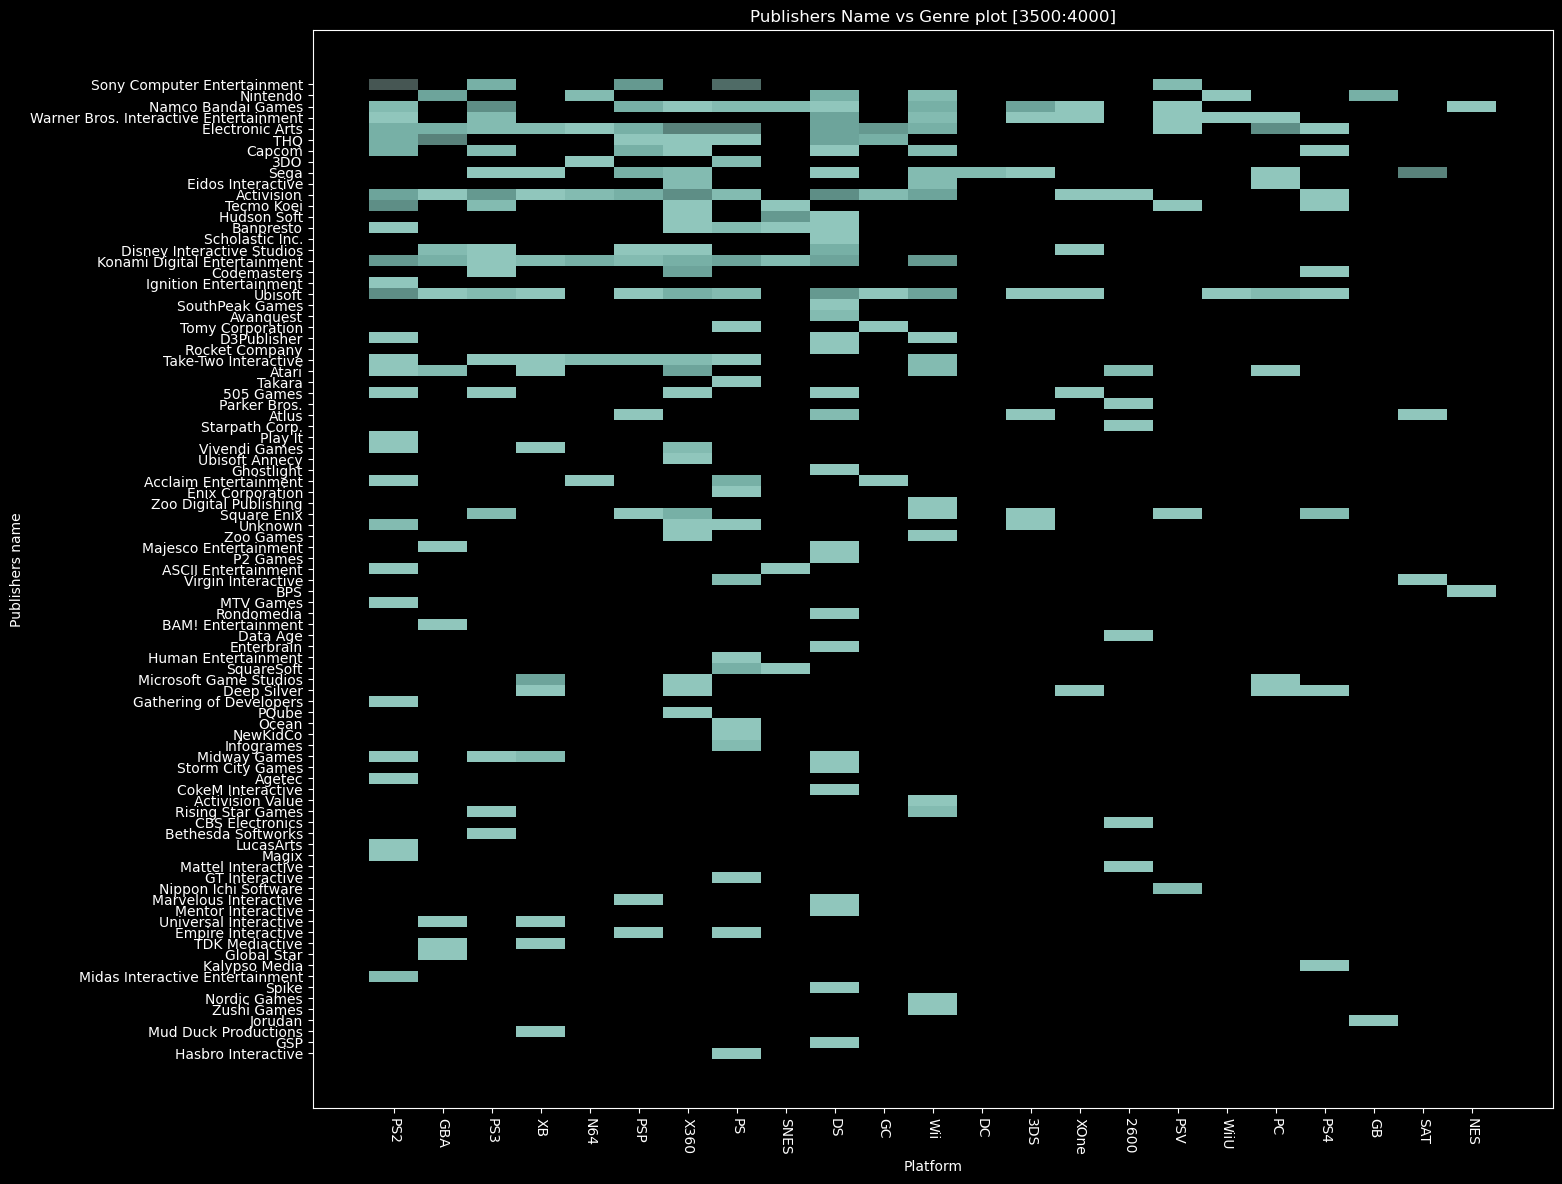

In [33]:
#Plot 5500 rows to 6000 rows
plt.figure(figsize=(16,14))
b=df.iloc[5500:6000,:6]
sns.histplot(x="Platform",y="Publisher", data=b, bins=20,kde=True)
plt.xlabel("Platform")
plt.ylabel("Publishers name")
plt.title("Publishers Name vs Genre plot [3500:4000]")
plt.xticks(rotation=-90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

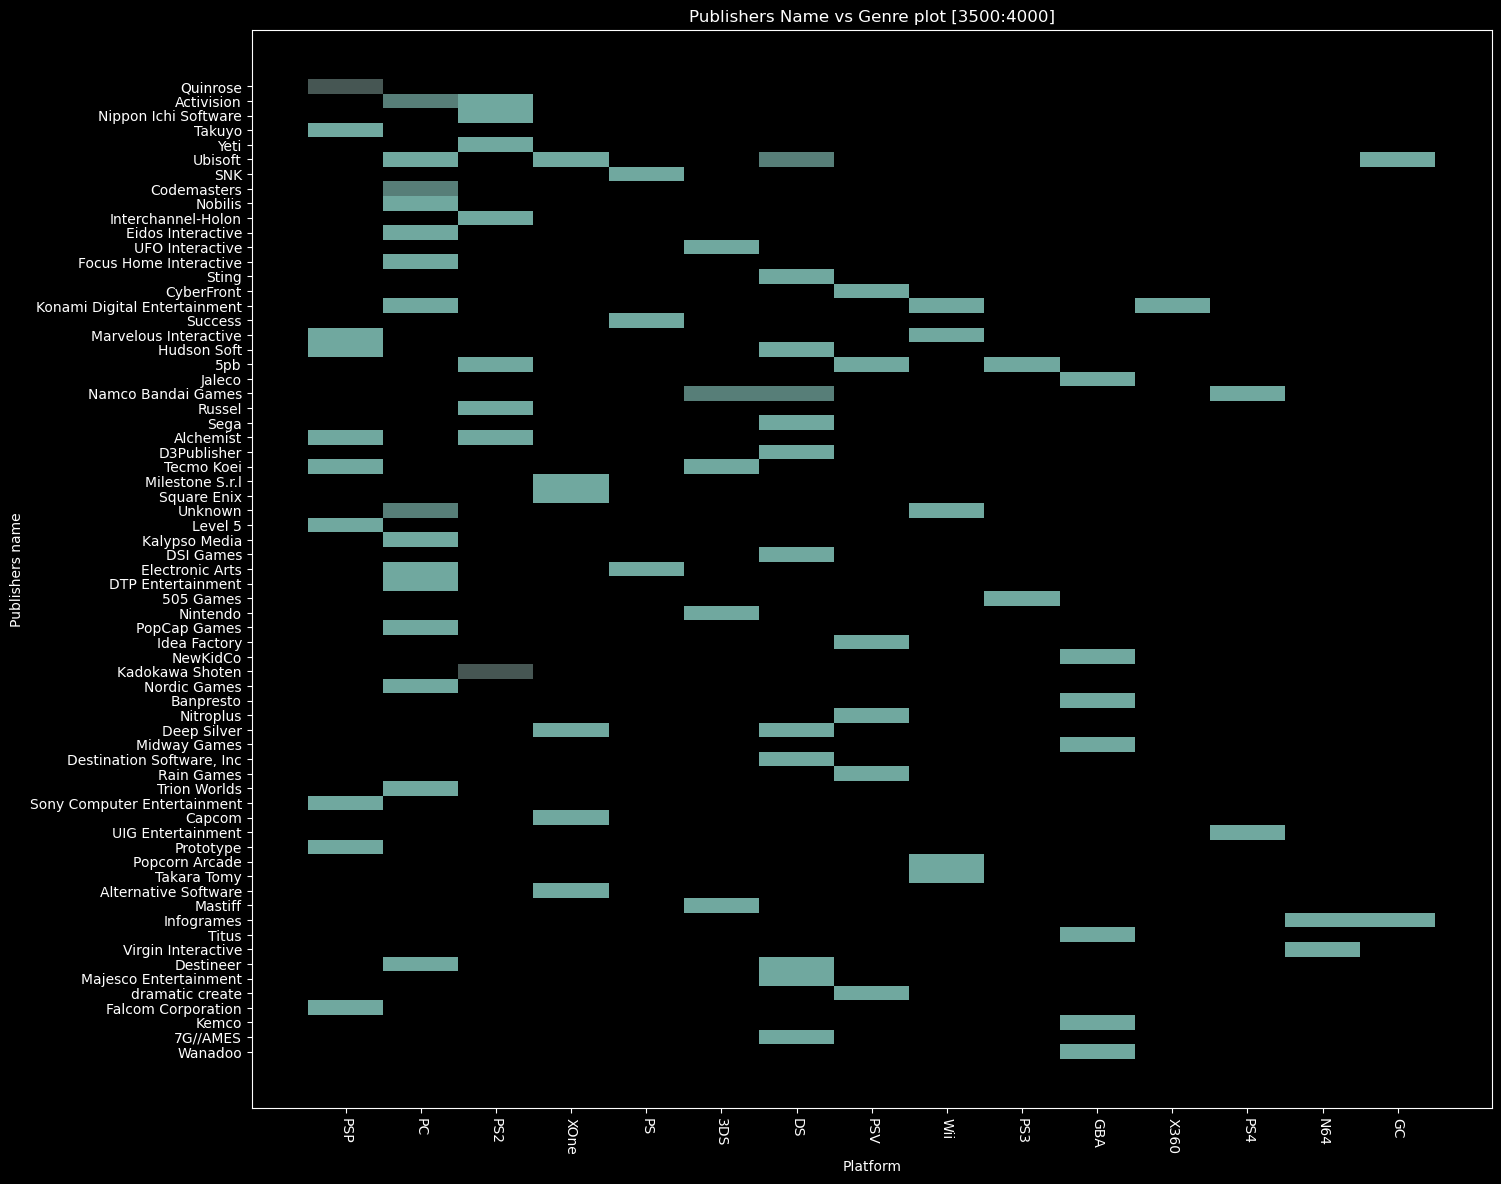

In [34]:
#Plot 5500 rows to 6000 rows
plt.figure(figsize=(16,14))
b=df.iloc[16500:16598,:6]
sns.histplot(x="Platform",y="Publisher", data=b, bins=20,kde=True)
plt.xlabel("Platform")
plt.ylabel("Publishers name")
plt.title("Publishers Name vs Genre plot [3500:4000]")
plt.xticks(rotation=-90)

In [35]:
tmp = (df.Platform == "GC" ) & (pd.isna(df.Publisher))
df.Publisher[tmp] = "Nintendo"
print("Fixed Publisher missing value:", tmp.sum())

tmp = (df.Platform == "N64" ) & (pd.isna(df.Publisher))
df.Publisher[tmp] = "Nintendo"
print("Fixed Publisher missing value:", tmp.sum())

tmp = (df.Platform == "GB" ) & (pd.isna(df.Publisher))
df.Publisher[tmp] = "Nintendo"
print("Fixed Publisher missing value:", tmp.sum())

tmp = (df.Platform == "SAT" ) & (pd.isna(df.Publisher))
df.Publisher[tmp] = "Sega"
print("Fixed Publisher missing value:", tmp.sum())

tmp = (df.Platform == "Wiiu" ) & (pd.isna(df.Publisher))
df.Publisher[tmp] = "Nintendo"
print("Fixed Publisher missing value:", tmp.sum())

tmp = (df.Platform == "PSV" ) & (pd.isna(df.Publisher))
df.Publisher[tmp] = "Sony Computer Entertainment Europe"
print("Fixed Publisher missing value:", tmp.sum())

tmp = (df.Platform == "DC" ) & (pd.isna(df.Publisher))
df.Publisher[tmp] = "Sega"
print("Fixed Publisher missing value:", tmp.sum())

tmp = (df.Platform == "SCD" ) & (pd.isna(df.Publisher))
df.Publisher[tmp] = "Sega"
print("Fixed Publisher missing value:", tmp.sum())

tmp = (df.Platform == "GEN" ) & (pd.isna(df.Publisher))
df.Publisher[tmp] = "Acclaim Entertainment"
print("Fixed Publisher missing value:", tmp.sum())

tmp = (df.Platform == "WS" ) & (pd.isna(df.Publisher))
df.Publisher[tmp] = "SquareSoft"
print("Fixed Publisher missing value:", tmp.sum())


tmp = (df.Platform == "NES" ) & (pd.isna(df.Publisher))
df.Publisher[tmp] = "Hudson Soft"
print("Fixed Publisher missing value:", tmp.sum())

tmp = (pd.isna(df.Publisher))                               
df.Publisher[tmp] = "electronic Arts"                            #fixed value by most frequent catagory
print("Fixed Publisher missing value:", tmp.sum())

print("Now Publisher variable missing value is: ",df.Publisher.isnull().sum())

Fixed Publisher missing value: 0
Fixed Publisher missing value: 0
Fixed Publisher missing value: 0
Fixed Publisher missing value: 0
Fixed Publisher missing value: 0
Fixed Publisher missing value: 2
Fixed Publisher missing value: 0
Fixed Publisher missing value: 0
Fixed Publisher missing value: 0
Fixed Publisher missing value: 0
Fixed Publisher missing value: 0
Fixed Publisher missing value: 56
Now Publisher variable missing value is:  0


In [36]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# Correlation-->

In [37]:
#Correlation check between all numerical variables
corr_metrics=df.corr()
correlation=corr_metrics["Global_Sales"].sort_values(ascending=False)
print(f"Correlation between all variables with Global_sales: ",correlation)

Correlation between all variables with Global_sales:  Global_Sales    1.000000
NA_Sales        0.941047
EU_Sales        0.902836
Other_Sales     0.748331
JP_Sales        0.611816
Year           -0.074804
Rank           -0.427407
Name: Global_Sales, dtype: float64


In [38]:
#Observation-->  Na_sales and EU_Sales are highly correlated with Global_Sales
#Global_sales increased whrn NA_sales and Eu_Sales increased
#and Rank is negatively correlated so if rank reduce then Global_sales is increase and vice versa

<AxesSubplot:>

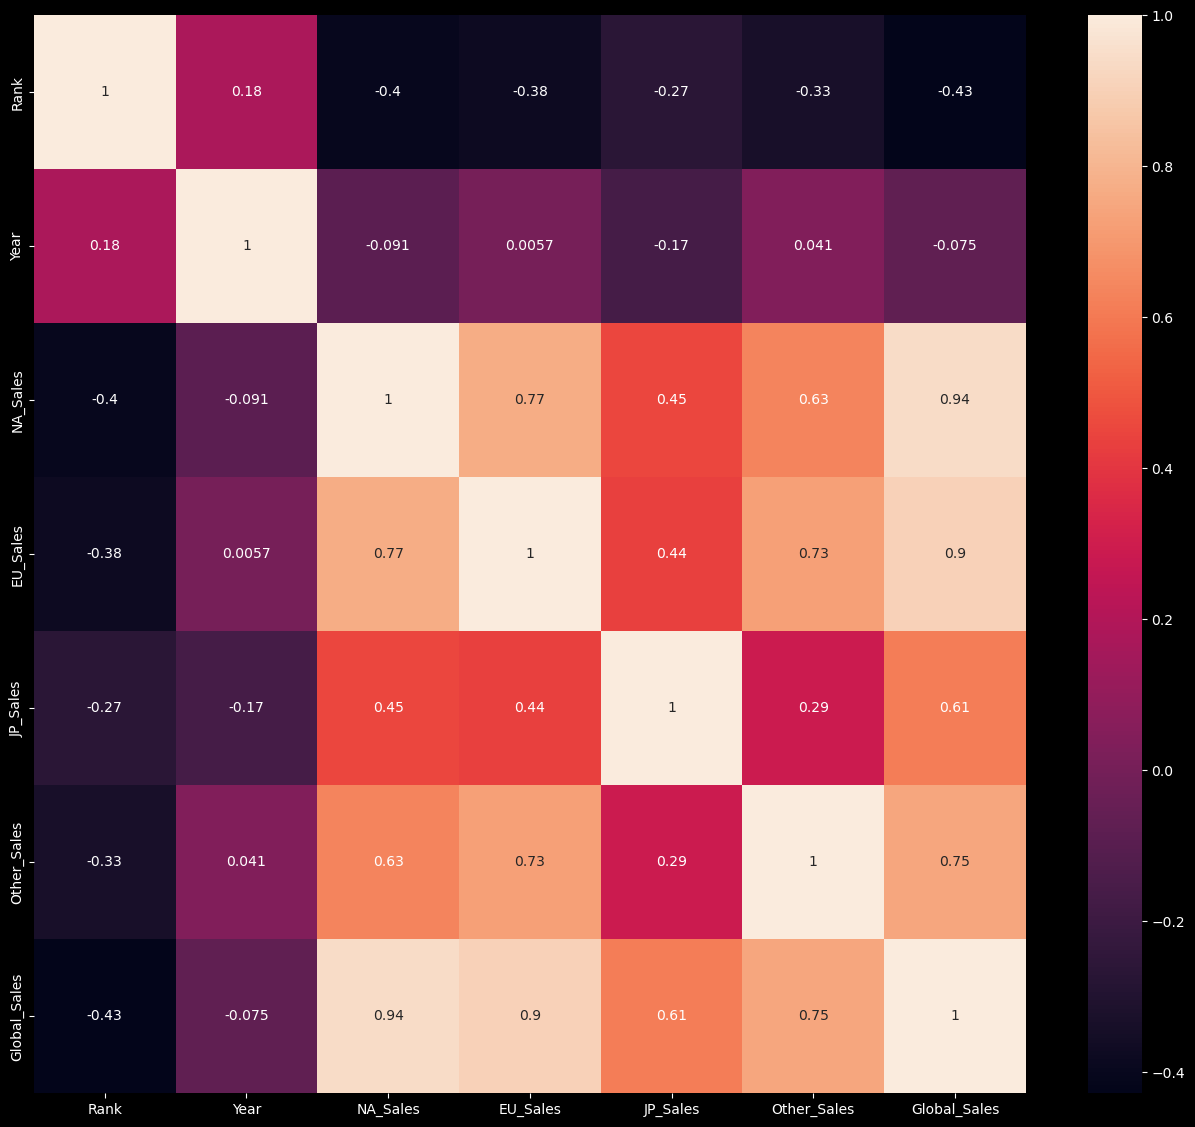

In [39]:
#plot of correlations--
plt.figure(figsize=(16,14))
sns.heatmap(corr_metrics,annot=True)                                #heatmap plot

In [40]:
#Finding categorical columns for labelencoding
cat_cols = [col for col in df.columns if (df[col].dtypes=='O') & (col!='education')]
cat_cols

['Name', 'Platform', 'Genre', 'Publisher']

# Label Encoding

In [41]:
#labelencoding--
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

label.fit(df.Name.drop_duplicates())                         
df.Name = label.transform(df.Name)                           #label encoding for Name column
print("Name column label encoding done!")

label.fit(df.Platform.drop_duplicates())
df.Platform = label.transform(df.Platform)                    #label encoding for Platform column
print("Platform column label encoding done!")

label.fit(df.Genre.drop_duplicates())
df.Genre = label.transform(df.Genre)                          #labels encoding for Genre column
print("Genre column label encoding done!")

label.fit(df.Publisher.drop_duplicates())
df.Publisher = label.transform(df.Publisher)                  #label encoding for Publisher column
print("Publisher column label encoding done!")

print("Data type of all columns-->")
#Dtype print after encoding
df.dtypes

Name column label encoding done!
Platform column label encoding done!
Genre column label encoding done!
Publisher column label encoding done!
Data type of all columns-->


Rank              int64
Name              int32
Platform          int32
Year            float64
Genre             int32
Publisher         int32
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

# Train Test Split

In [42]:
#In this dataset except Global_Sales every variable is a features
#So, separate the Gloabl_sales from data set
x=df.drop("Global_Sales",axis=1)                         #features data
y=df["Global_Sales"]                                     #labels data
print("Features and label are splitted into x and y!")

#Train test split--->
from sklearn.model_selection import train_test_split      #import train_test_split libaries
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("Train test data are splitted completely!!")

Features and label are splitted into x and y!
Train test data are splitted completely!!


# Standard Scaling on Features

In [43]:
#Scaling the features-->
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


scaler.fit_transform(x_train)                     #standard scaling of x_train
scaler.transform(x_test)                          #standard scaling of x_test

array([[ 0.12812505, -0.86509475, -0.33185804, ..., -0.07455155,
        -0.25131623, -0.09958915],
       [-0.73439655,  1.40537743,  0.14591823, ..., -0.2324656 ,
        -0.21892343, -0.0419229 ],
       [ 1.49619808, -1.26272771, -0.33185804, ..., -0.2775839 ,
        -0.25131623, -0.27258791],
       ...,
       [ 1.53995975,  0.4509382 ,  0.38480636, ..., -0.3227022 ,
        -0.18653063, -0.27258791],
       [ 0.40965843, -0.94828533,  0.02647416, ..., -0.2324656 ,
        -0.25131623, -0.21492166],
       [ 0.52948204, -0.85158004, -1.40685463, ..., -0.2775839 ,
        -0.25131623, -0.21492166]])

# Model Build

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#model = RandomForestRegressor()
model = LinearRegression()
#modle = LogisticRegression()

#model fit of x_train and y_train 
model.fit(x_train,y_train)

#x_test prediction by using model
prediction = model.predict(x_test)

#r2 score calculation
score= r2_score(y_test,prediction)*100
print("r2 score of the model is: ",score)
if score >=90:
    print("This model is outstanding!")
elif score >=80 & score < 90:
    print("This model is good!")
else:
    print("this model is not that much good improve it!")

r2 score of the model is:  99.9993507371408
This model is outstanding!


# Error Calculation

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Mean absolute error is:",mean_absolute_error(y_test,prediction))
print("Mean squared error is:",mean_squared_error(y_test,prediction))
print("Mean squared root error is:",np.sqrt(mean_squared_error(y_test,prediction)))

Mean absolute error is: 0.0030219516277952543
Mean squared error is: 2.7277895878661698e-05
Mean squared root error is: 0.0052228245115705065
